# Macro research topic 1
## Quantifying geopolitical uncertainty that isn’t yet reflected in the markets


### Introduction

-  The world is currently experiencing more conflicts than at any time since the post-9/11 Iraq war.
-  I believe the risk of nuclear war is at its highest level since the Cold War.
-  Despite these risks, the S&P 500 keeps reaching new highs, driven by the ChatGPT initiated tech boom.
-  Markets seem aware of war risks, as shown by Bitcoin's quick drop when Iran attacked Israel with war drones. S&P 500 did not reflect this drop as it was a Sunday.
-  This leads me to believe that that markets believe AI's economic benefits outweigh the potential negative impacts of war.
-  This study aims to:
  1. Measure the positive effects of AI and negative effects of war on the economy
  2. Analyze how these 2 factors are currently priced into markets
  3. Compare the current situations with the 2000 tech boom and Cold War era to identify possible future scenarios.

### DOWNLOAD DATA

In [54]:
import pandas as pd
from yahooquery import Ticker
from fredapi import Fred
import os
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Initialize Yahoo Finance and FRED tickers
yahoo_tickers = {
    # Equity Indices
    "^DJI": "Dow Jones Industrial Average",
    "^GSPC": "S&P 500",
    "^N225": "Nikkei 225",
    "^FTSE": "FTSE 100",
    "^HSI": "Hang Seng Index",
    "^BSESN": "BSE Sensex",
    "^MXX": "IPC Mexico",
    "^BVSP": "Bovespa Index",
    "^RTS": "RTS Index",

    # Commodities
    "CL=F": "WTI Crude Oil",
    "BZ=F": "Brent Crude Oil",
    "GC=F": "Gold Futures",
    "SI=F": "Silver Futures",
    "ZS=F": "Soybean Futures",
    "ZW=F": "Wheat Futures",
    "HG=F": "Copper Futures",

    # Currencies
    "EURUSD=X": "Euro/US Dollar",
    "USDJPY=X": "US Dollar/Japanese Yen",
    "USDMXN=X": "US Dollar/Mexican Peso",
    "USDZAR=X": "US Dollar/South African Rand",

    # Fixed Income
    "^TNX": "10-Year Treasury Yield",
    "^TYX": "30-Year Treasury Yield",
    "^FVX": "5-Year Treasury Yield",
    "^IRX": "13-Week Treasury Bill Yield",

    # Corporate Bonds
    "LQD": "Investment Grade Corporate Bond ETF",
    "HYG": "High Yield Corporate Bond ETF",

    # Volatility
    "^VIX": "CBOE Volatility Index",

    # Cryptocurrencies
    "BTC-USD": "Bitcoin (BTC)",
}

fred_series = {
    # Growth and Employment
    'GDP': 'Gross Domestic Product',
    'UNRATE': 'Unemployment Rate',
    'INDPRO': 'Industrial Production',
    'PAYEMS': 'Nonfarm Payrolls',
    'CIVPART': 'Labor Force Participation Rate',

    # Inflation and Prices
    'CPIAUCSL': 'Consumer Price Index',
    'PPIACO': 'Producer Price Index',
    'PCEPILFE': 'Core PCE Price Index',

    # Trade and Globalization
    'BOPGSTB': 'Trade Balance',
    'DTWEXBGS': 'US Dollar Index',

    # Financial Conditions
    'FEDFUNDS': 'Federal Funds Rate',
    'T10Y2Y': '10-Year Treasury Minus 2-Year Treasury Spread',
    'BAA10Y': 'Moody’s BAA Corporate Bond Yield Spread',
    'STLFSI': 'St. Louis Fed Financial Stress Index'
}

# Initialize data containers
yahoo_data = {}
fred_data = {}

# Fetch data from Yahoo Finance
for ticker, name in yahoo_tickers.items():
    try:
        data = Ticker(ticker)
        history = data.history(period="max")
        if not history.empty:  # Ensure data exists for the ticker
            history['Ticker'] = ticker
            history['Name'] = name
            yahoo_data[ticker] = history
            print(f"Fetched data for {name} ({ticker})")
        else:
            print(f"No data for {name} ({ticker})")
            
    except Exception as e:
        print(f"Error fetching data for {name} ({ticker}): {e}")

# Fetch data from FRED API (ensure you replace the API key with your own)
fred_api_key = os.getenv('FRED_API_KEY')  # Replace with your FRED API key or set it as an environment variable
fred = Fred(api_key=fred_api_key)

for series_id, series_name in fred_series.items():
    try:
        series_data = fred.get_series(series_id)
        if series_data is not None and not series_data.empty:  # Ensure data exists for the series
            series_df = pd.DataFrame(series_data, columns=['Value'])
            series_df['Ticker'] = series_id
            series_df['Name'] = series_name
            fred_data[series_id] = series_df
            print(f"Fetched data for {series_name} ({series_id})")
        else:
            print(f"No data for {series_name} ({series_id})")
            
    except Exception as e:
        print(f"Error fetching data for {series_name} ({series_id}): {e}")

Fetched data for Dow Jones Industrial Average (^DJI)
Fetched data for S&P 500 (^GSPC)
Fetched data for Nikkei 225 (^N225)
Fetched data for FTSE 100 (^FTSE)
Fetched data for Hang Seng Index (^HSI)
Fetched data for BSE Sensex (^BSESN)
Fetched data for IPC Mexico (^MXX)
Fetched data for Bovespa Index (^BVSP)
Fetched data for RTS Index (^RTS)
Fetched data for WTI Crude Oil (CL=F)
Fetched data for Brent Crude Oil (BZ=F)
Fetched data for Gold Futures (GC=F)
Fetched data for Silver Futures (SI=F)
Fetched data for Soybean Futures (ZS=F)
Fetched data for Wheat Futures (ZW=F)
Fetched data for Copper Futures (HG=F)
Fetched data for Euro/US Dollar (EURUSD=X)
Fetched data for US Dollar/Japanese Yen (USDJPY=X)
Fetched data for US Dollar/Mexican Peso (USDMXN=X)
Fetched data for US Dollar/South African Rand (USDZAR=X)
Fetched data for 10-Year Treasury Yield (^TNX)
Fetched data for 30-Year Treasury Yield (^TYX)
Fetched data for 5-Year Treasury Yield (^FVX)
Fetched data for 13-Week Treasury Bill Yield (

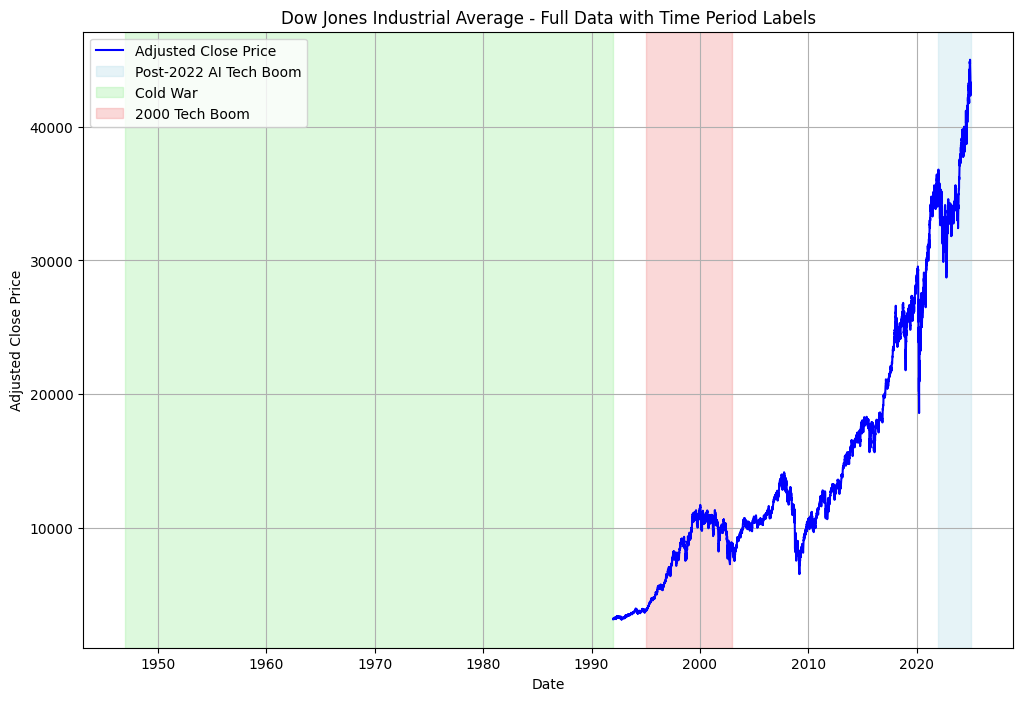

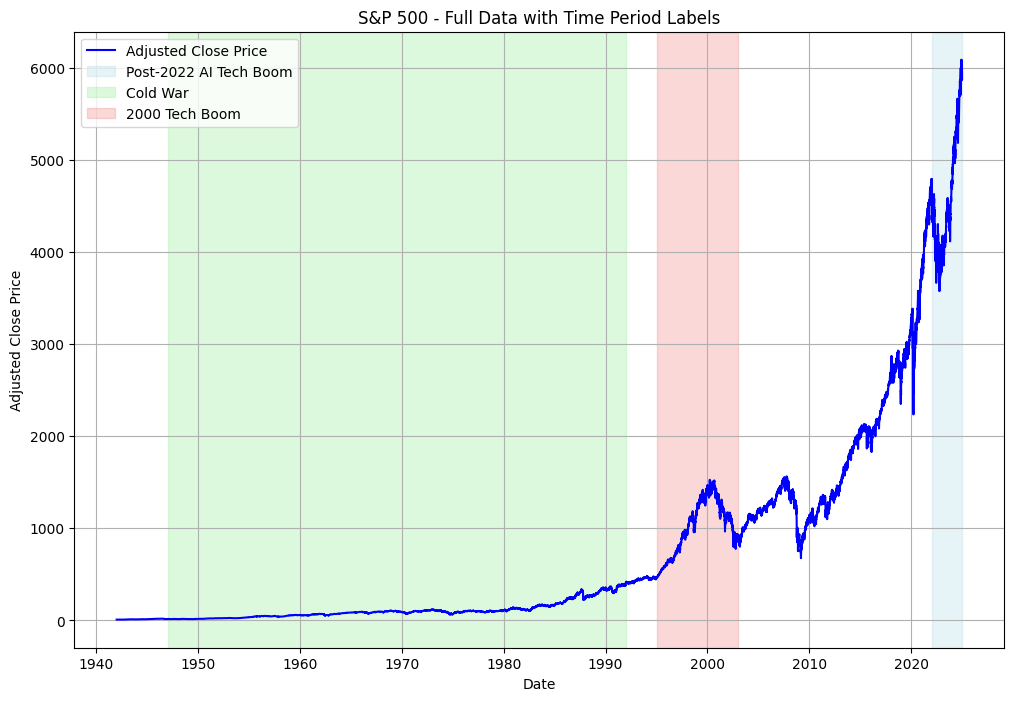

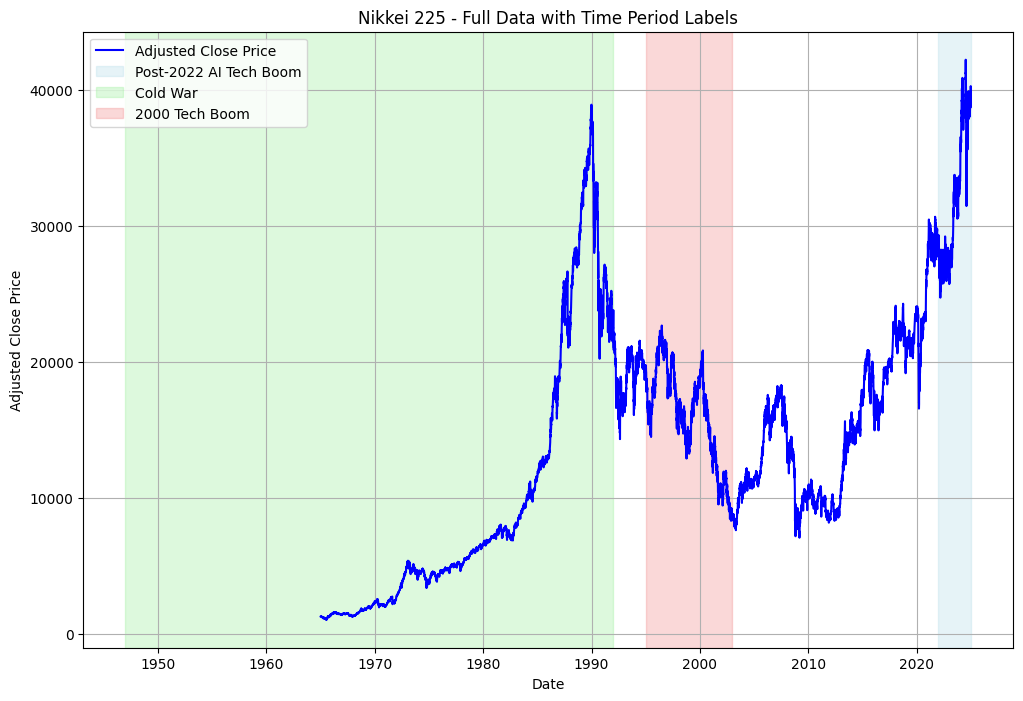

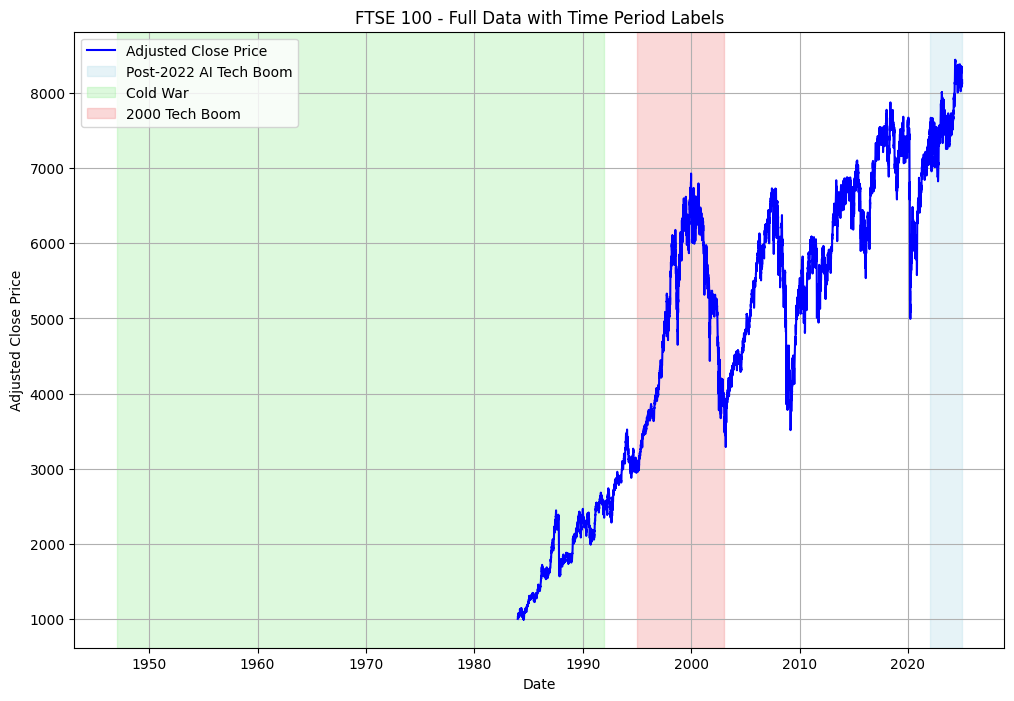

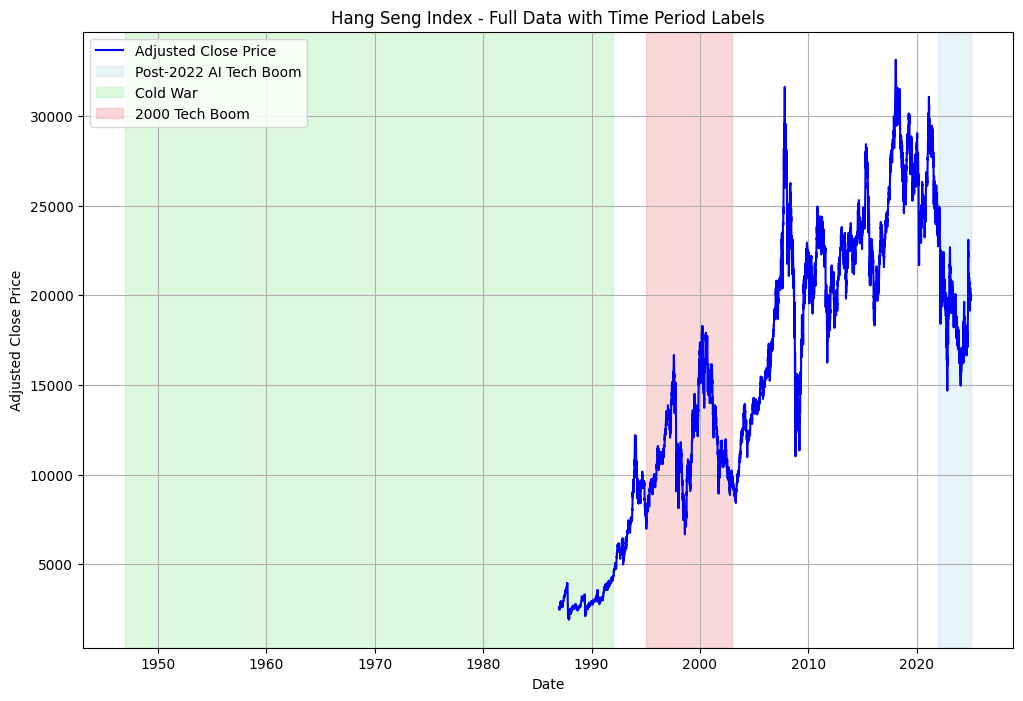

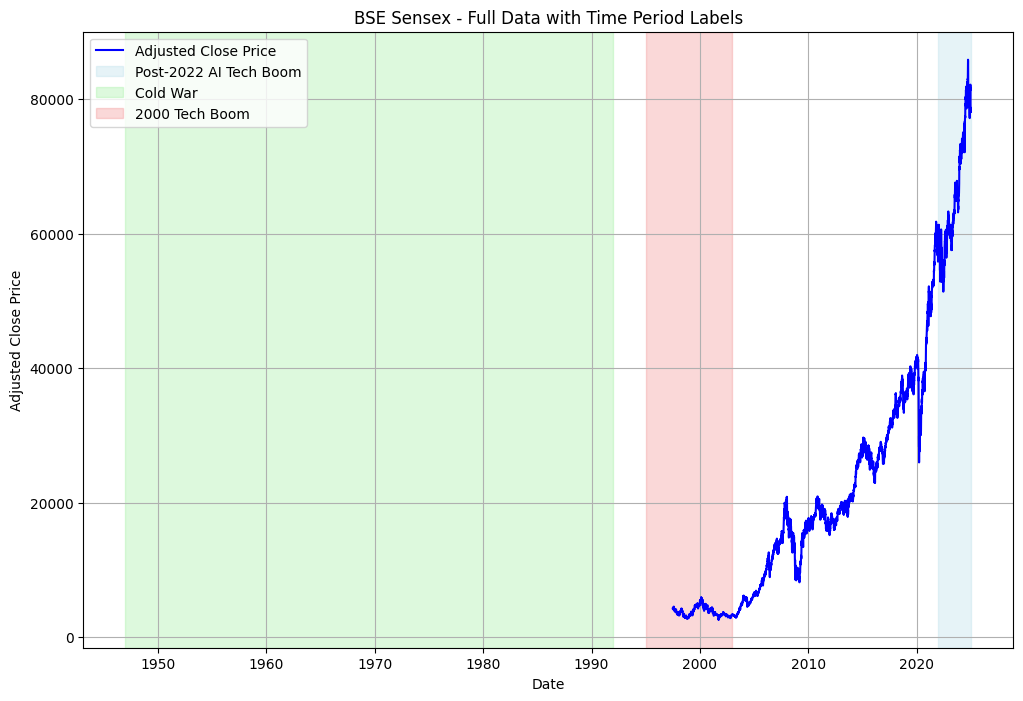

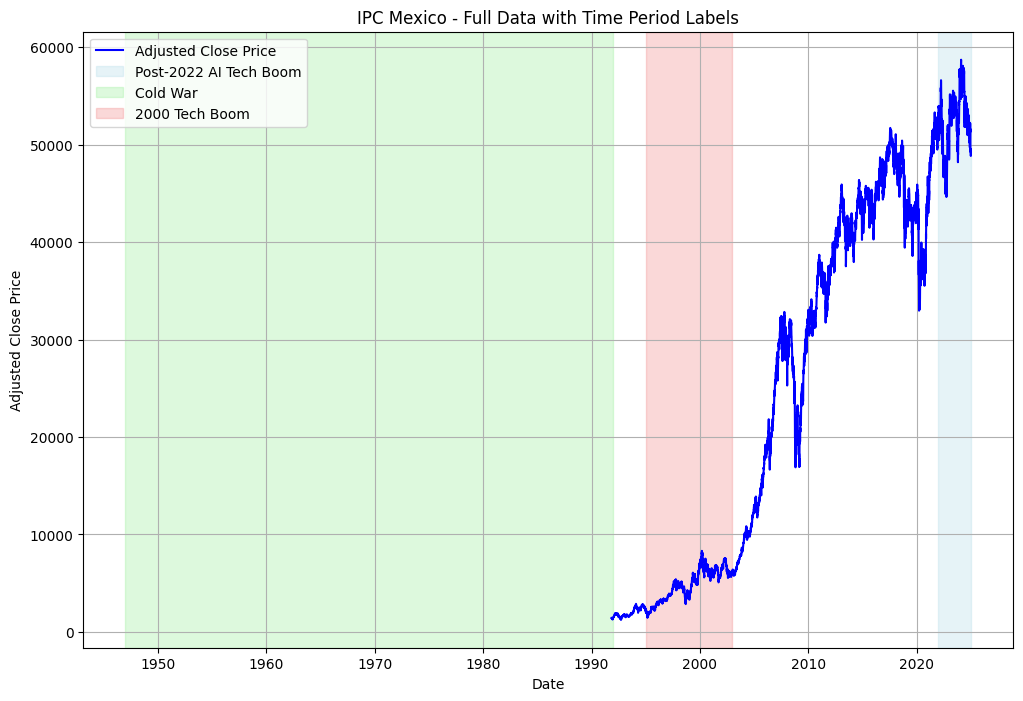

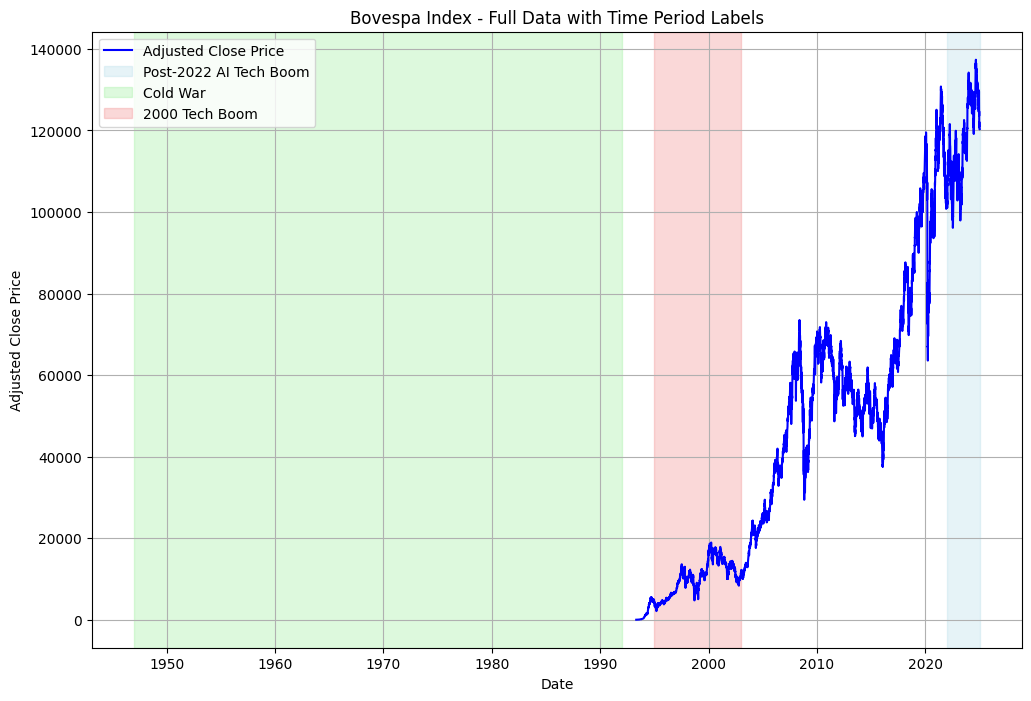

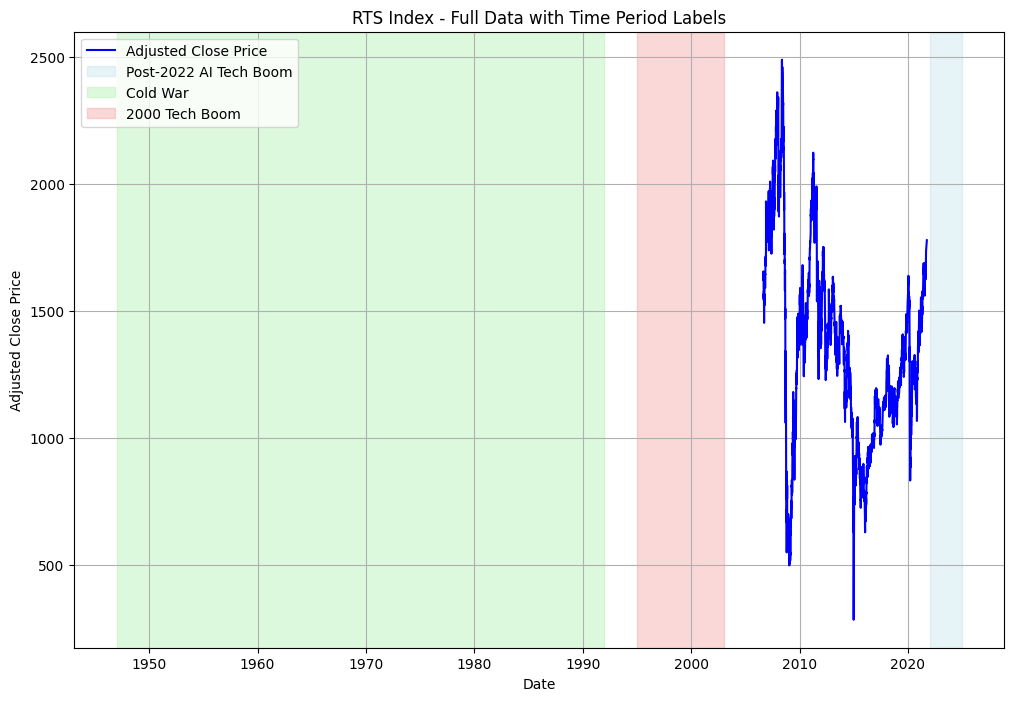

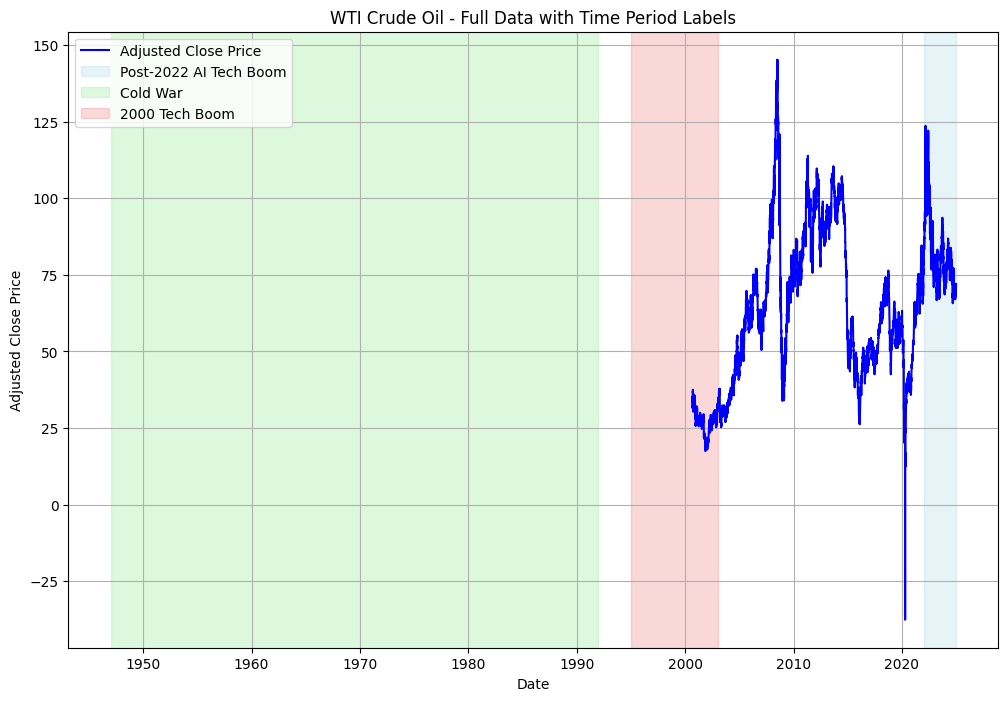

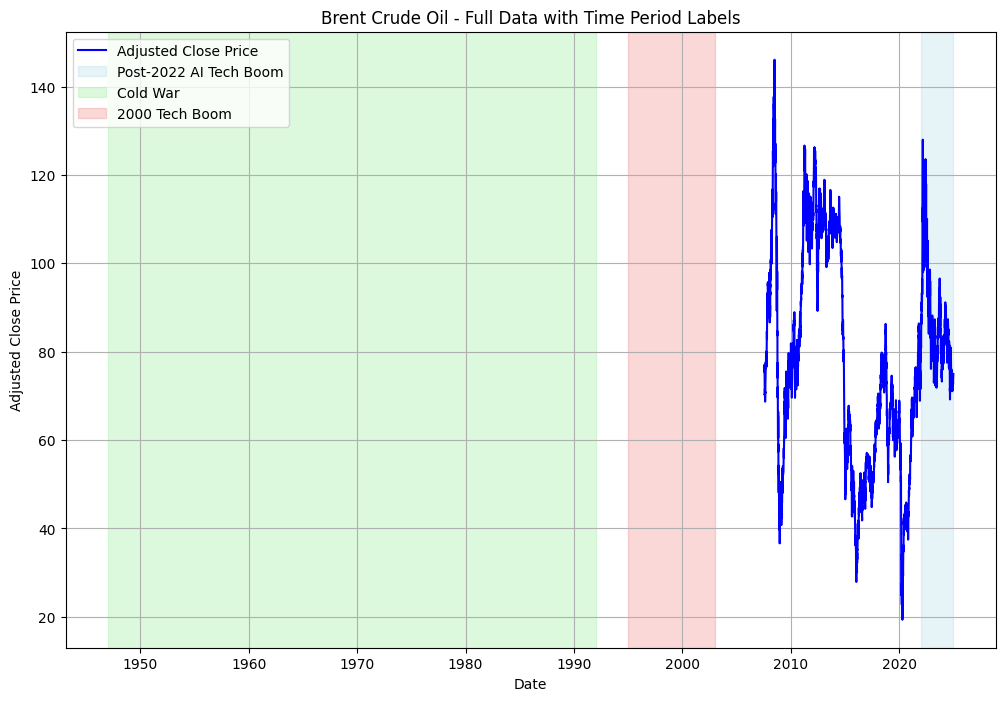

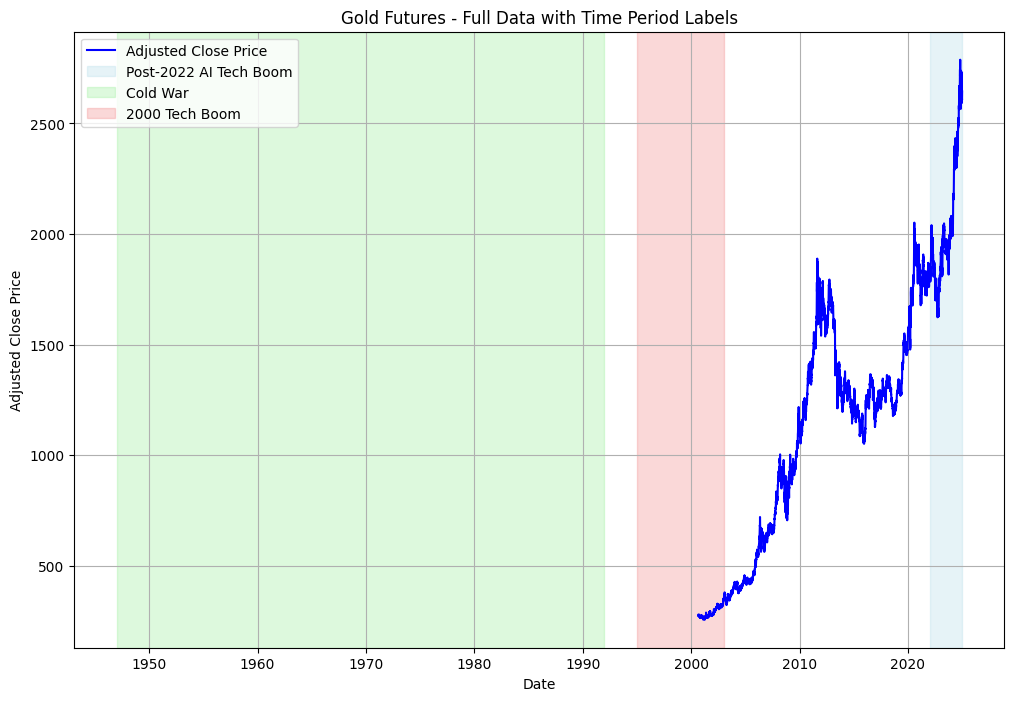

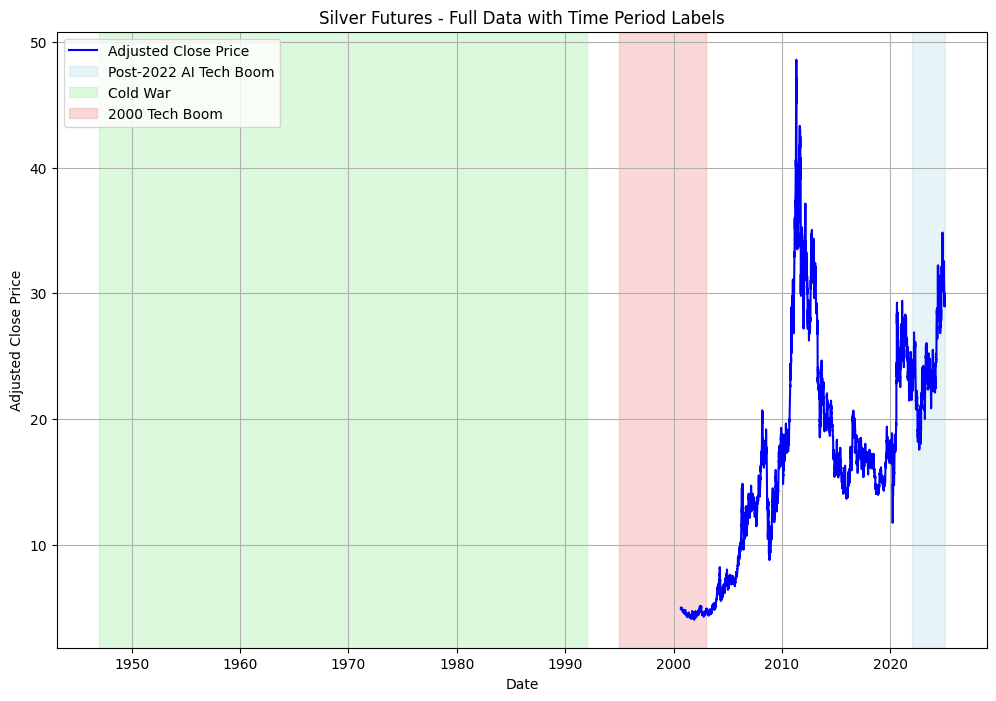

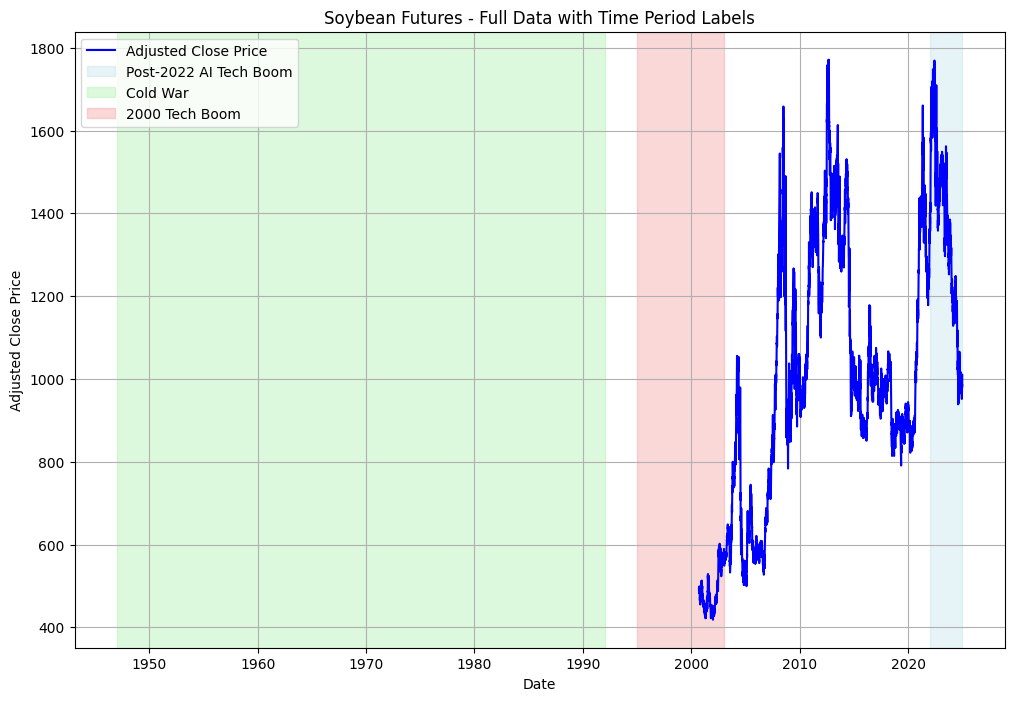

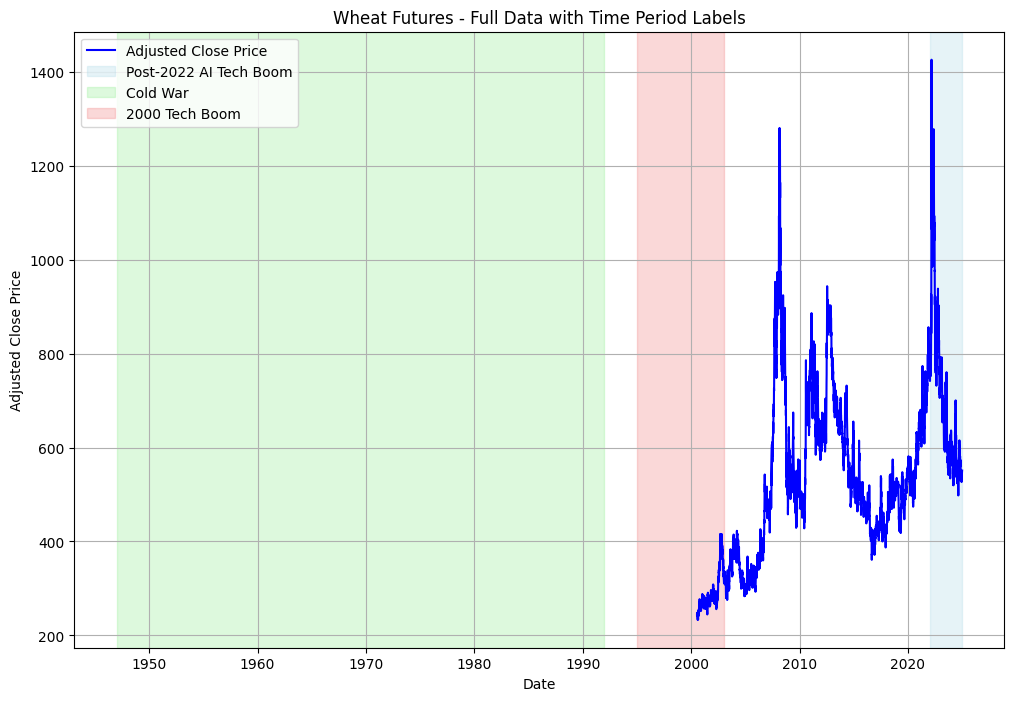

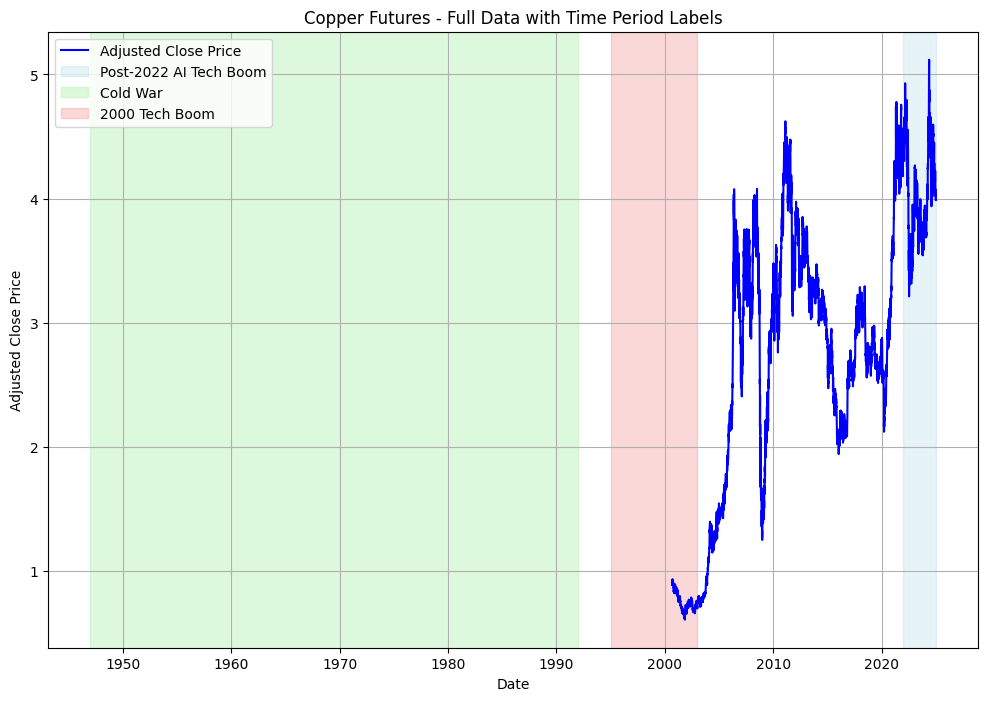

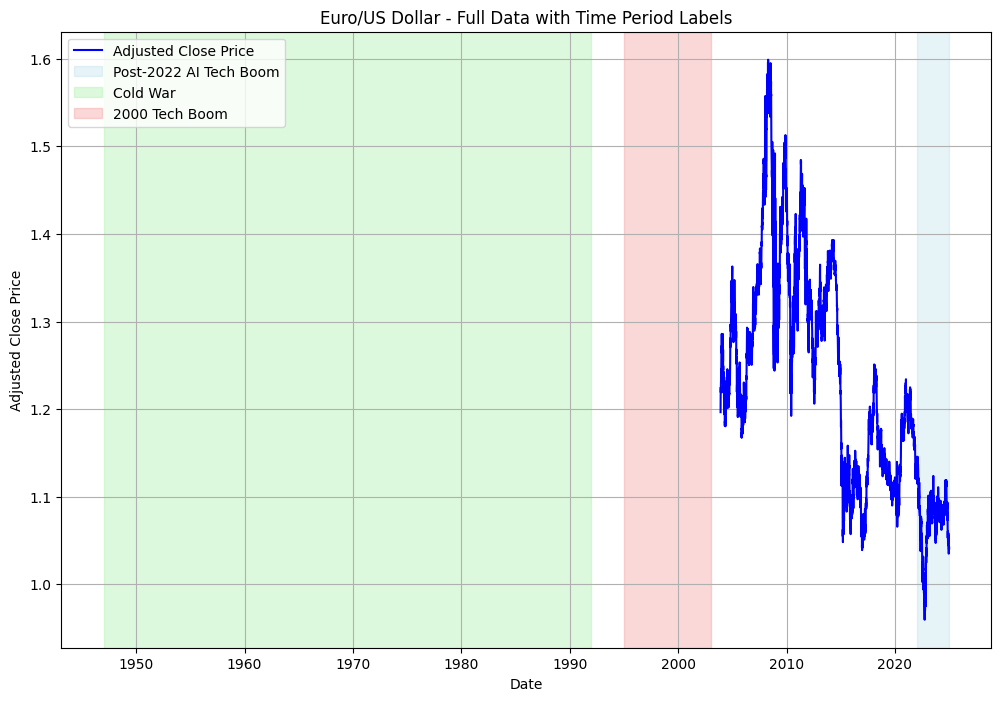

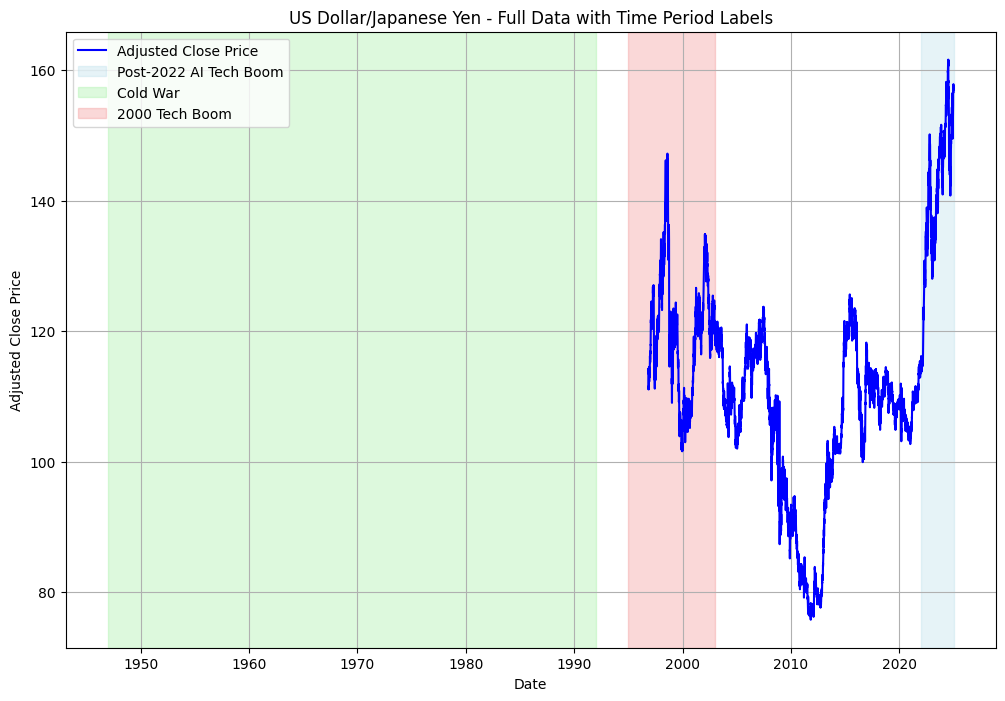

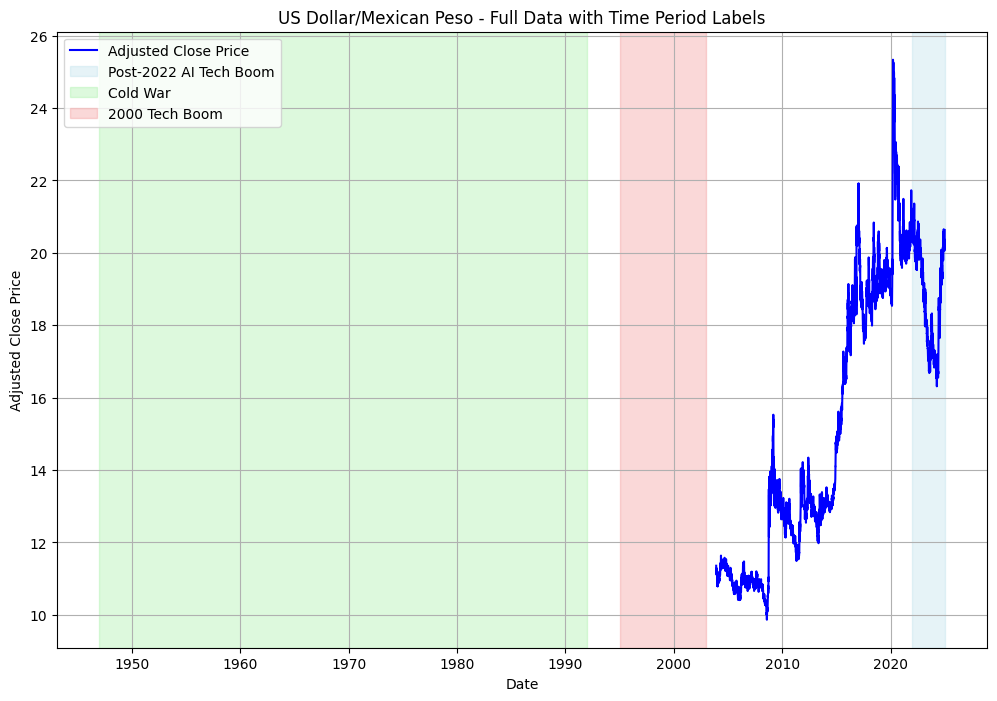

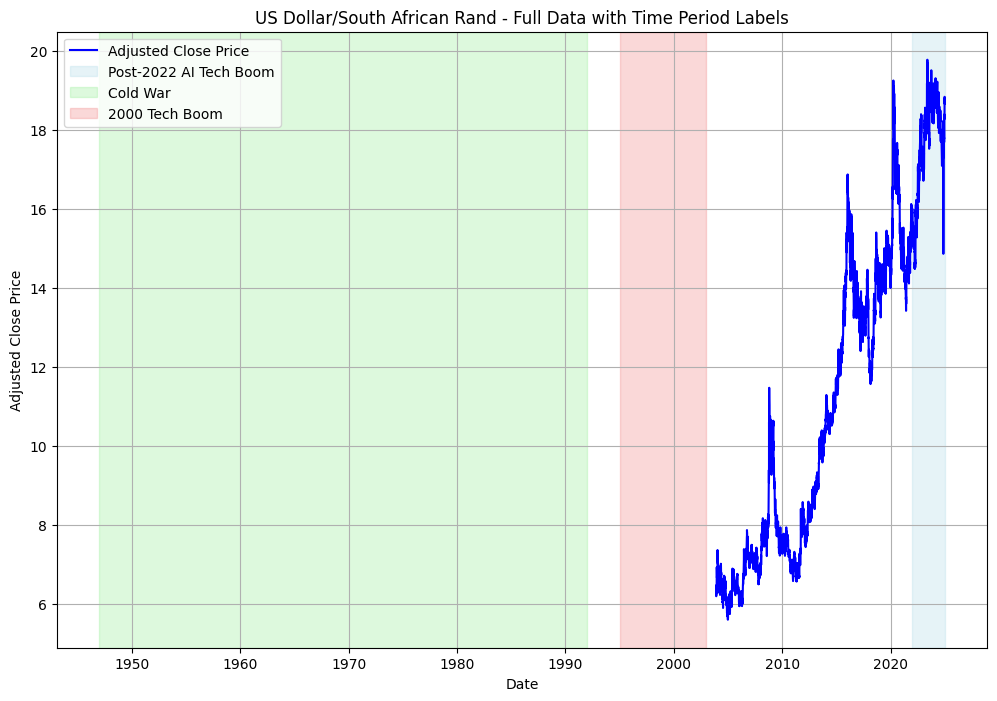

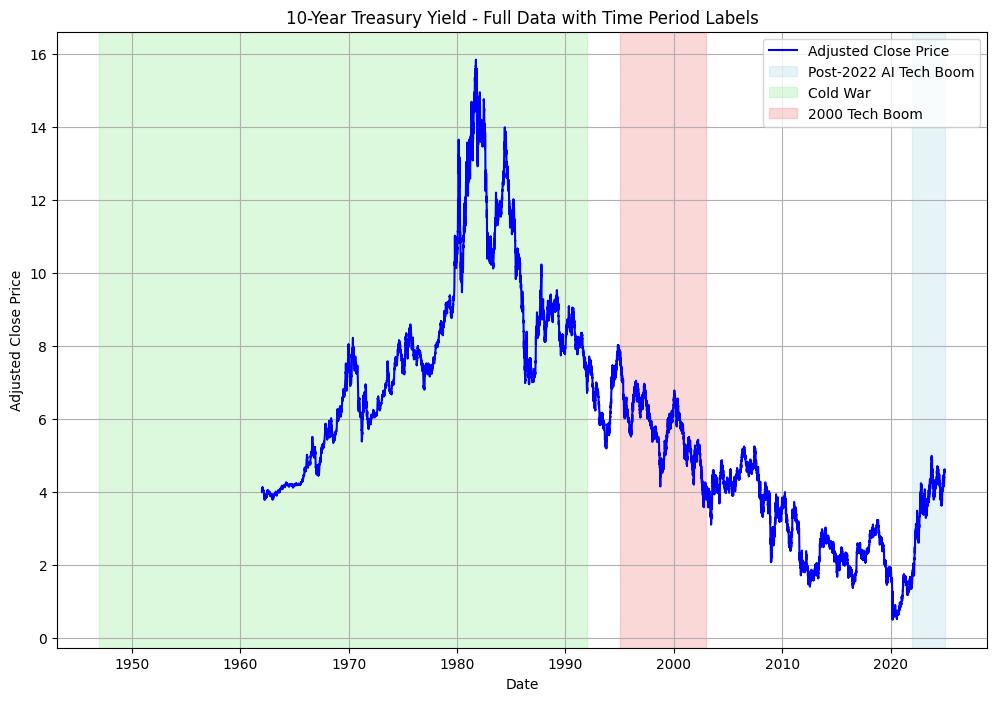

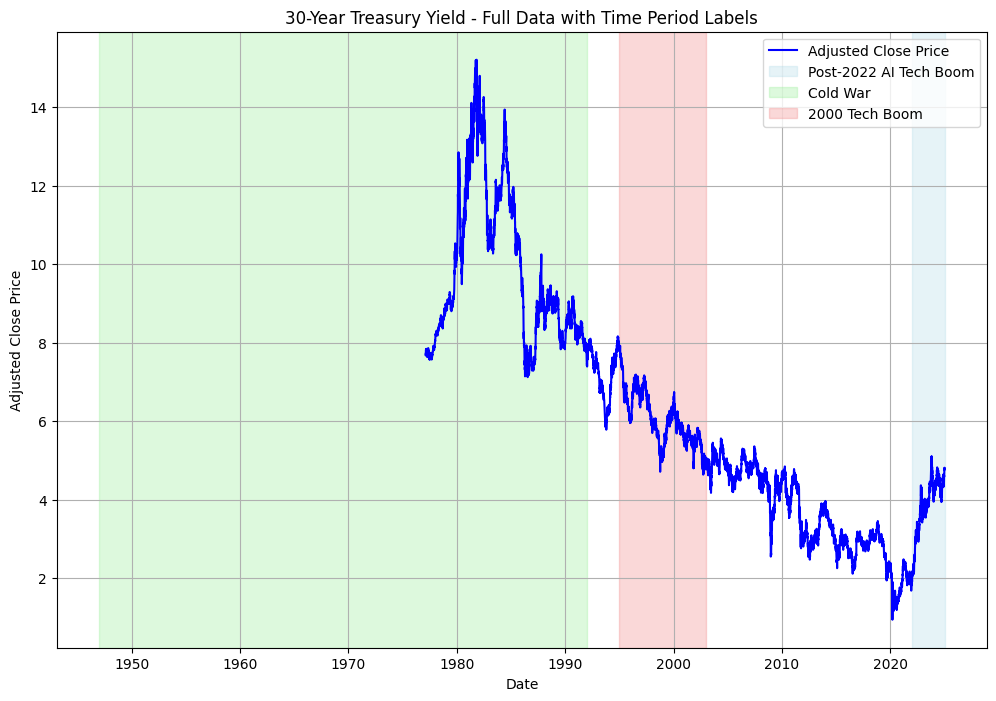

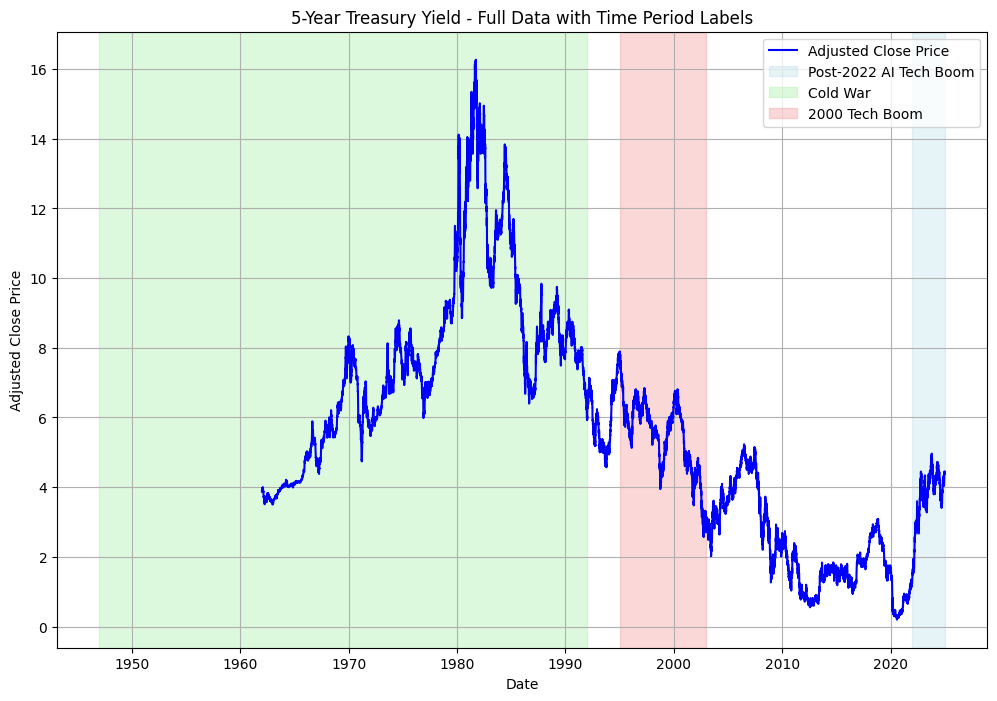

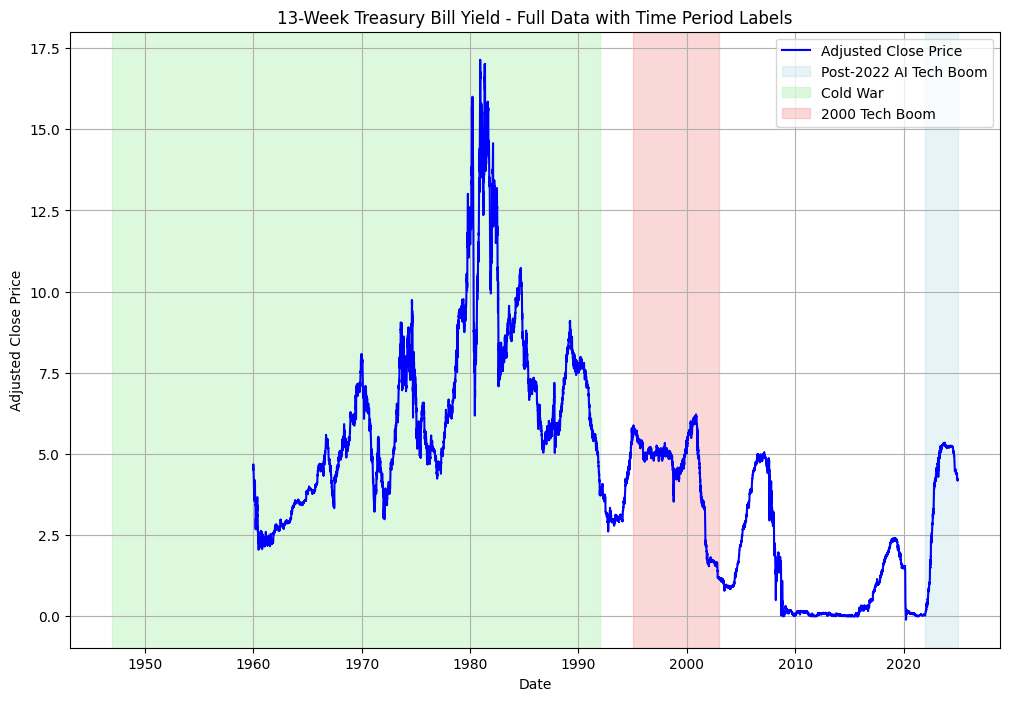

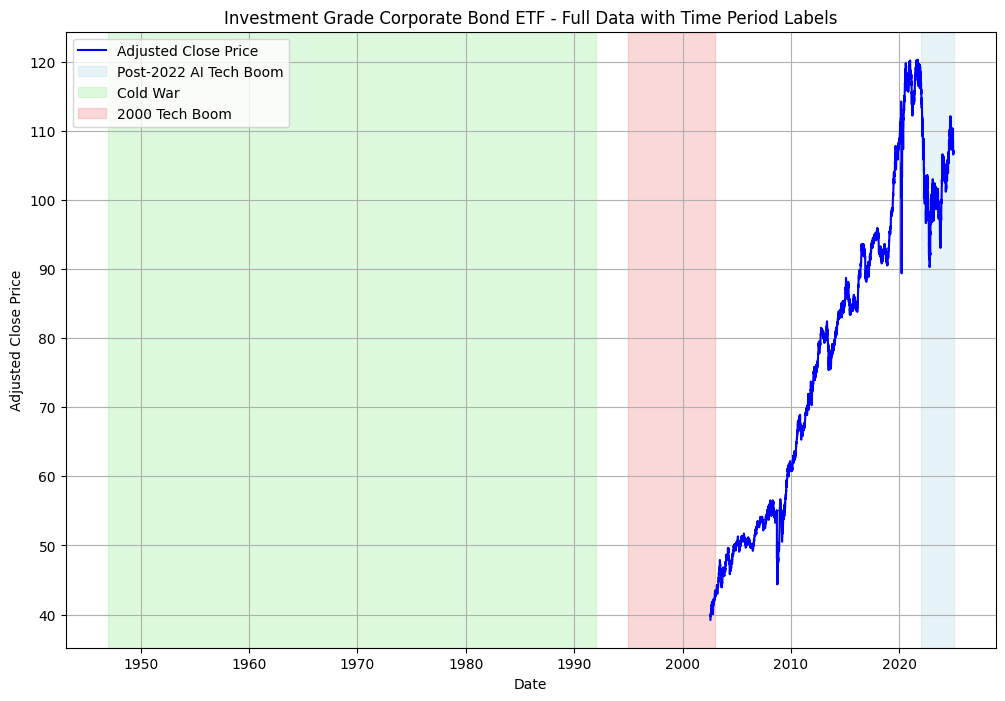

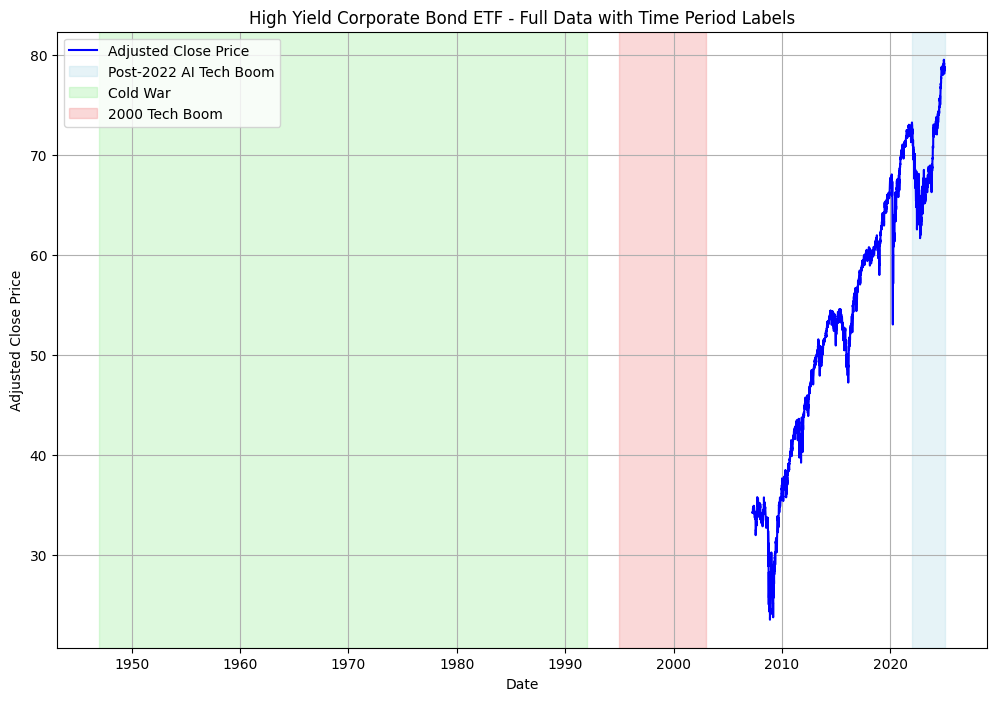

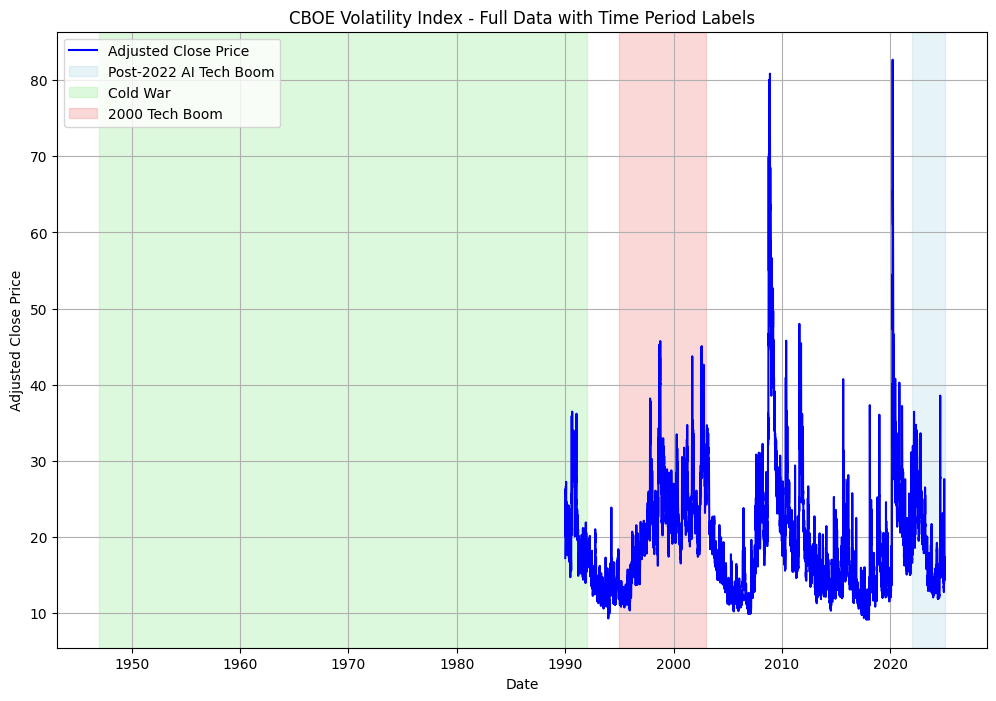

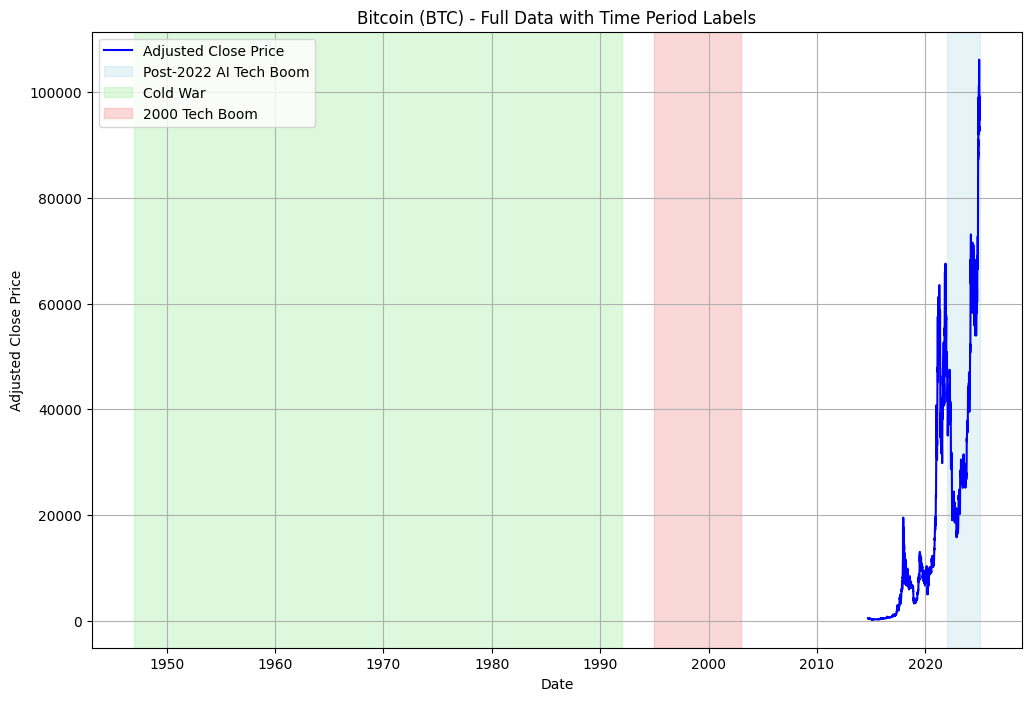

In [55]:
# Define time periods and their corresponding colors
time_periods = {
    "Post-2022 AI Tech Boom": ("2022-01-01", "2025-01-01"),
    "Cold War": ("1947-01-01", "1991-12-31"),
    "2000 Tech Boom": ("1995-01-01", "2002-12-31")
}
time_period_colors = {
    "Post-2022 AI Tech Boom": "lightblue",
    "Cold War": "lightgreen",
    "2000 Tech Boom": "lightcoral"
}

# Function to plot all data for a ticker with time periods labeled and differentiated by color
def plot_ticker_with_time_period_labels(ticker_data, time_periods, ticker_names):
    for ticker, data in ticker_data.items():
        # Reset index and ensure date is properly formatted
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index()
        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], utc=True)  # Ensure timezone-aware datetime
            data.set_index('date', inplace=True)

        plt.figure(figsize=(12, 8))
        # Plot all data for the ticker
        plt.plot(data.index, data['adjclose'], label="Adjusted Close Price", color='blue')

        # Add shaded regions for each time period with different colors
        for period_name, (start_date, end_date) in time_periods.items():
            plt.axvspan(pd.Timestamp(start_date, tz='UTC'), pd.Timestamp(end_date, tz='UTC'),
                        alpha=0.3, color=time_period_colors[period_name], label=period_name)

        # Use the actual name of the ticker in the title
        plt.title(f"{ticker_names[ticker]} - Full Data with Time Period Labels")
        plt.xlabel("Date")
        plt.ylabel("Adjusted Close Price")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage with your yahoo_data dictionary and yahoo_tickers mapping
plot_ticker_with_time_period_labels(yahoo_data, time_periods, yahoo_tickers)


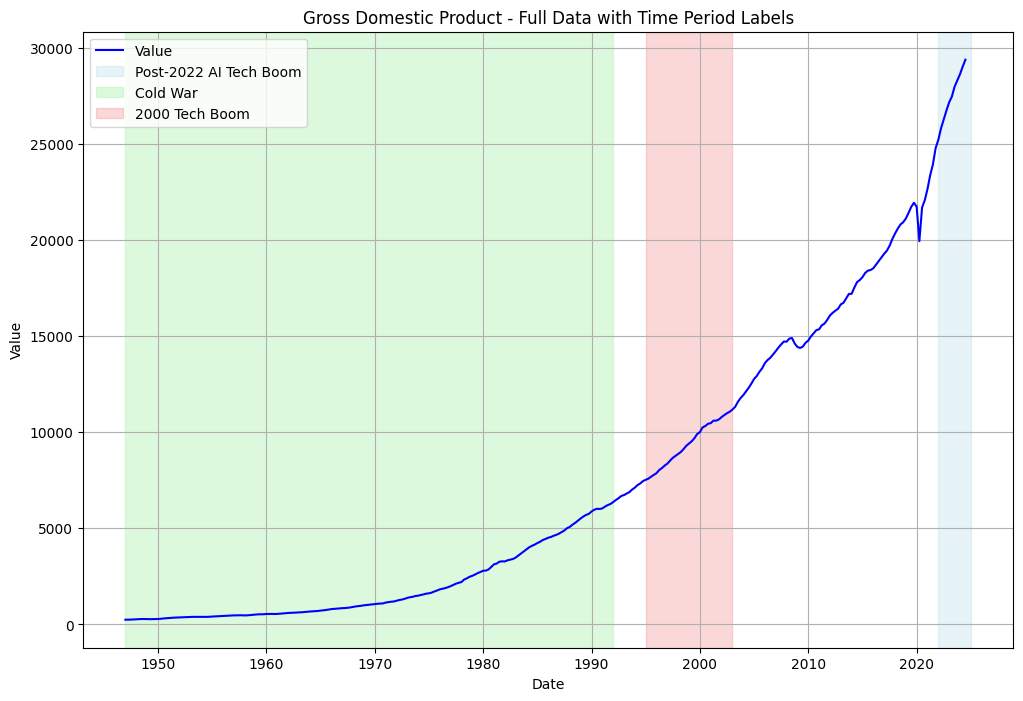

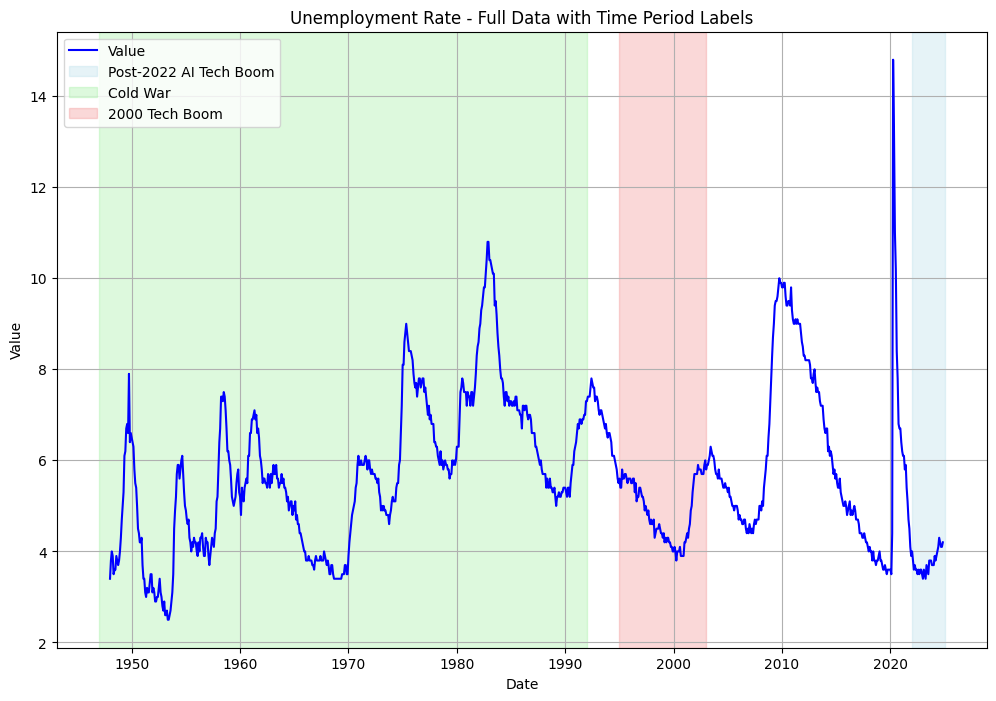

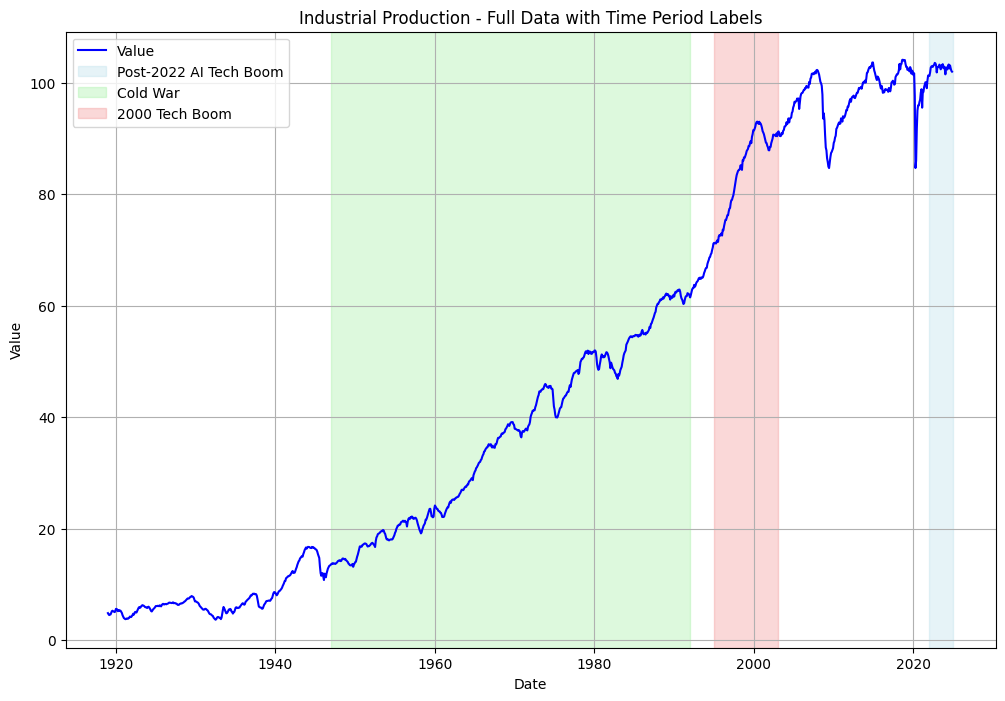

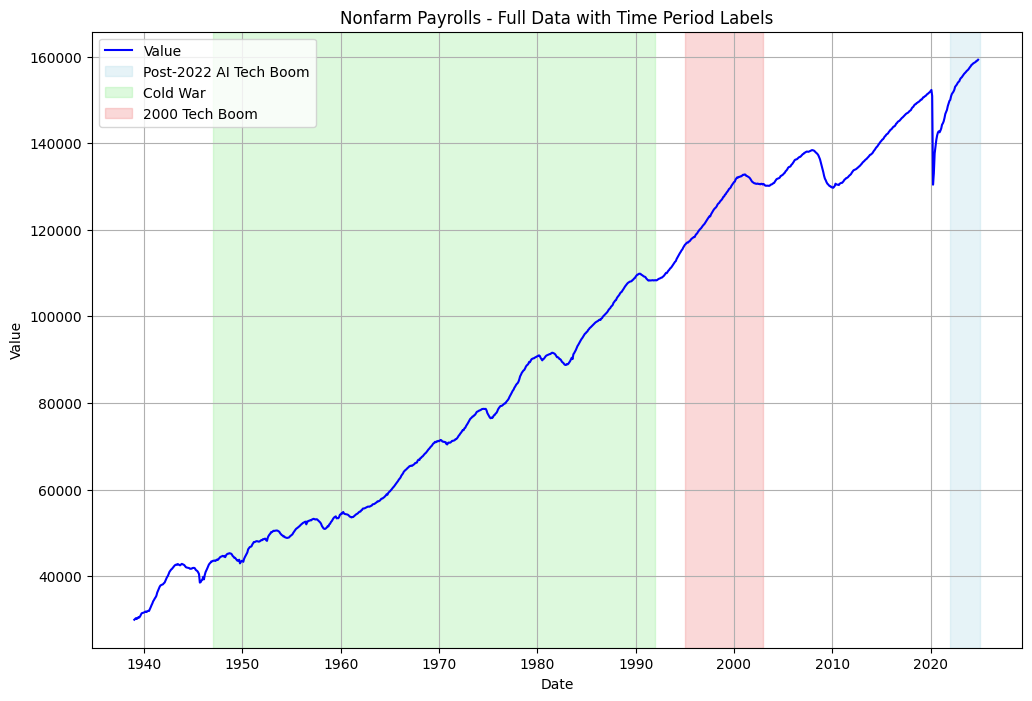

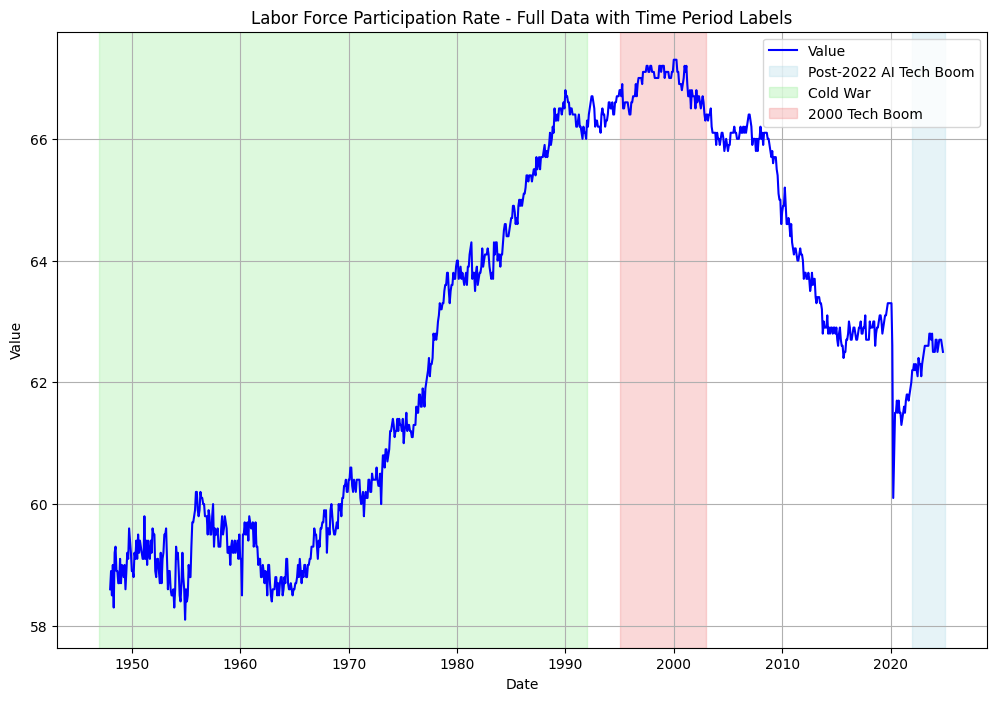

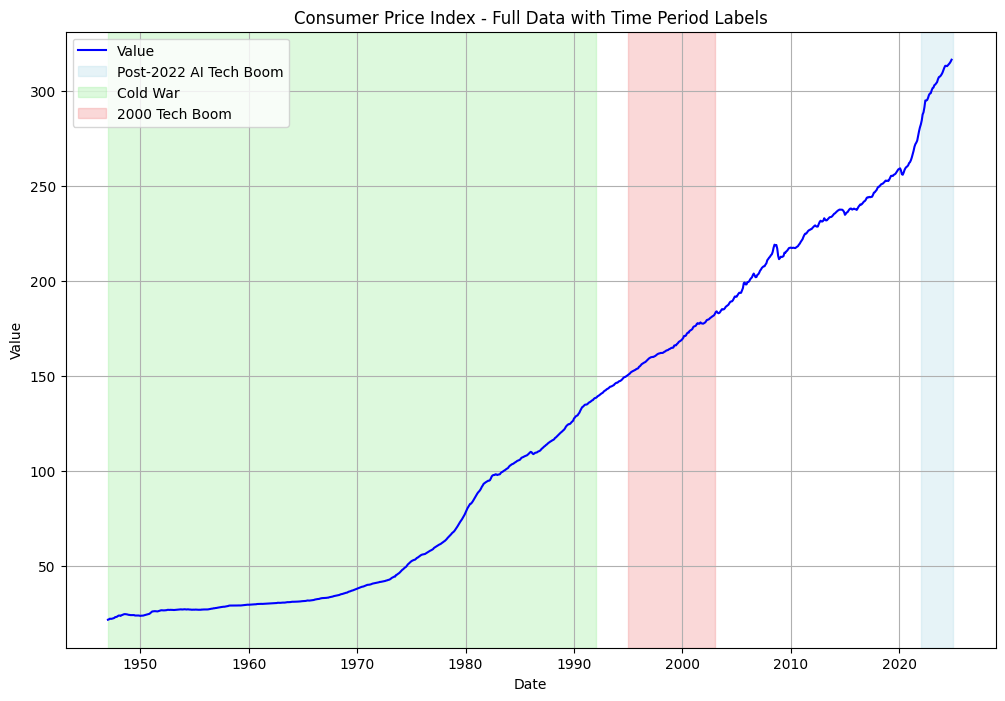

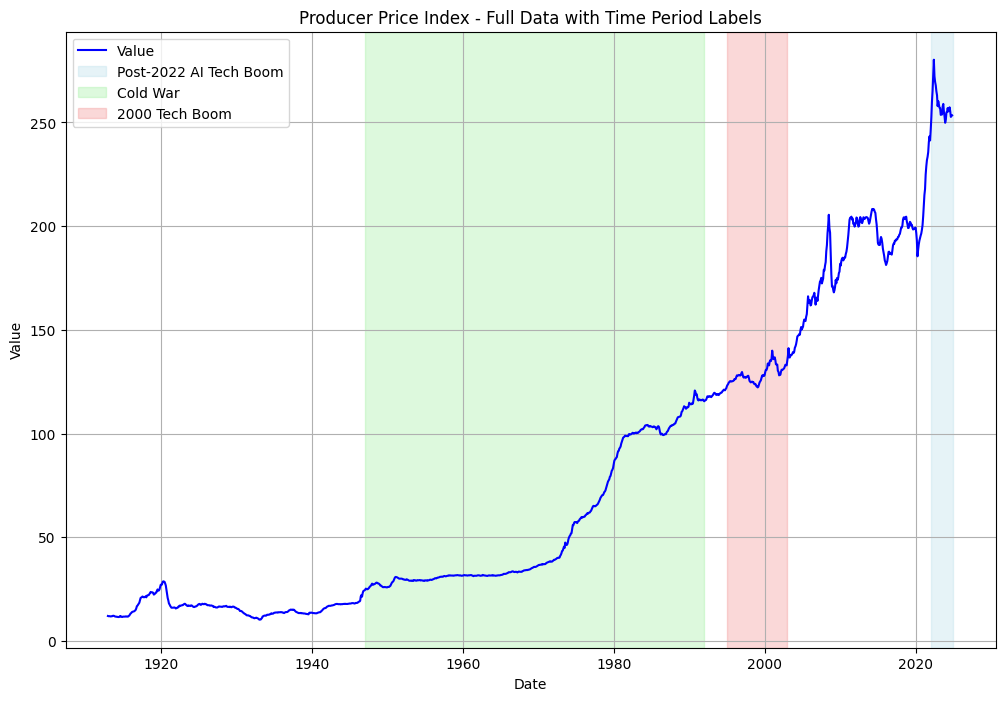

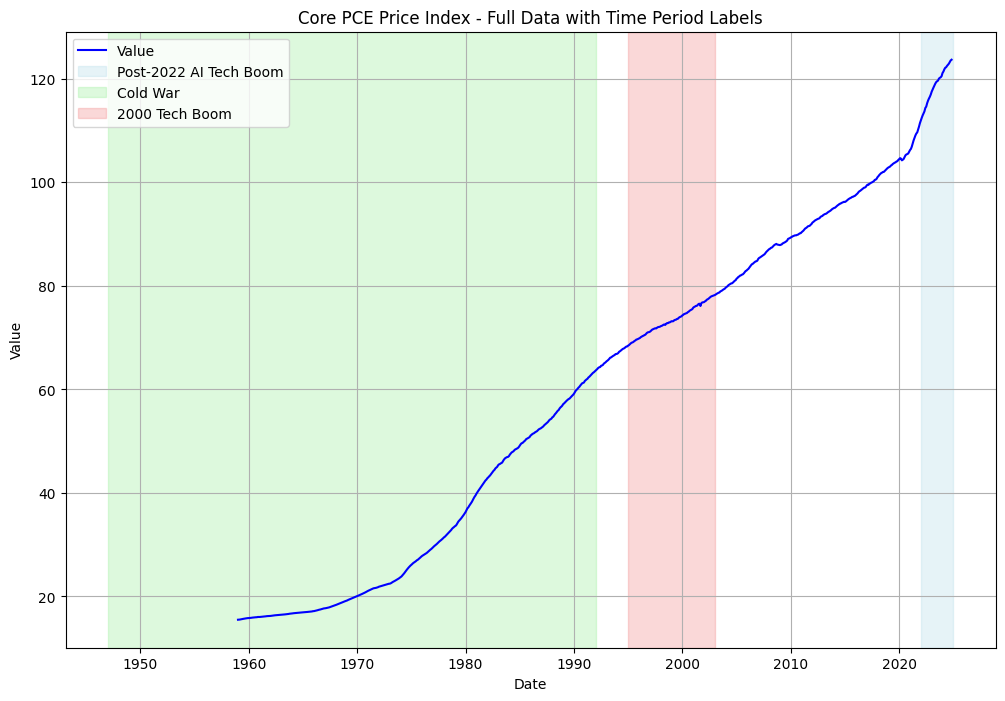

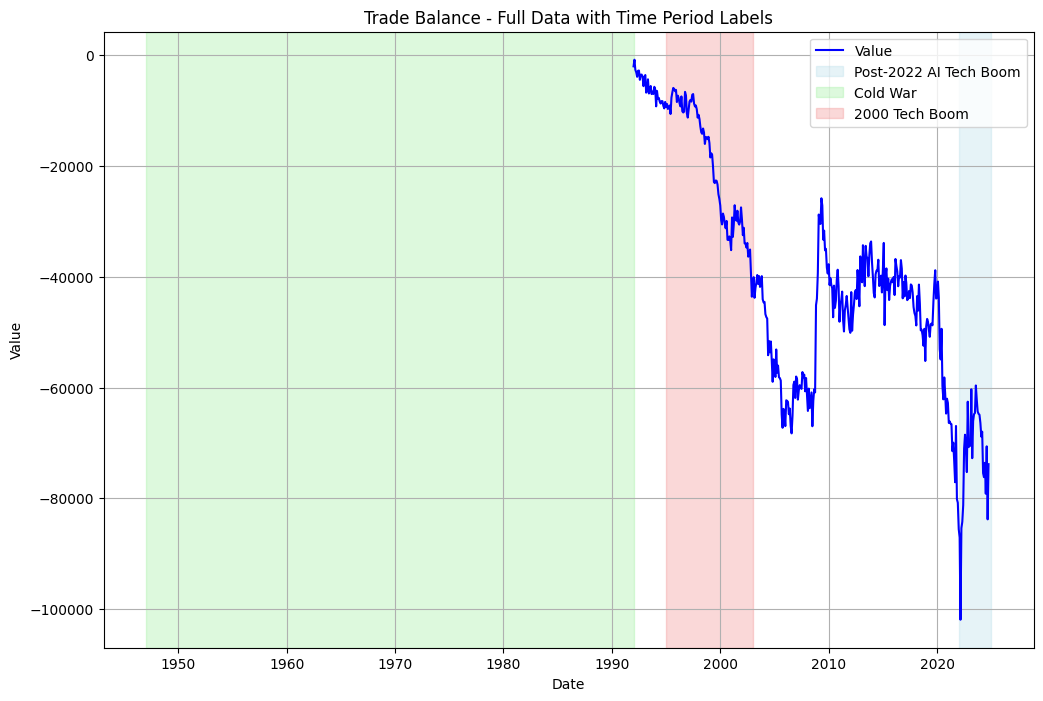

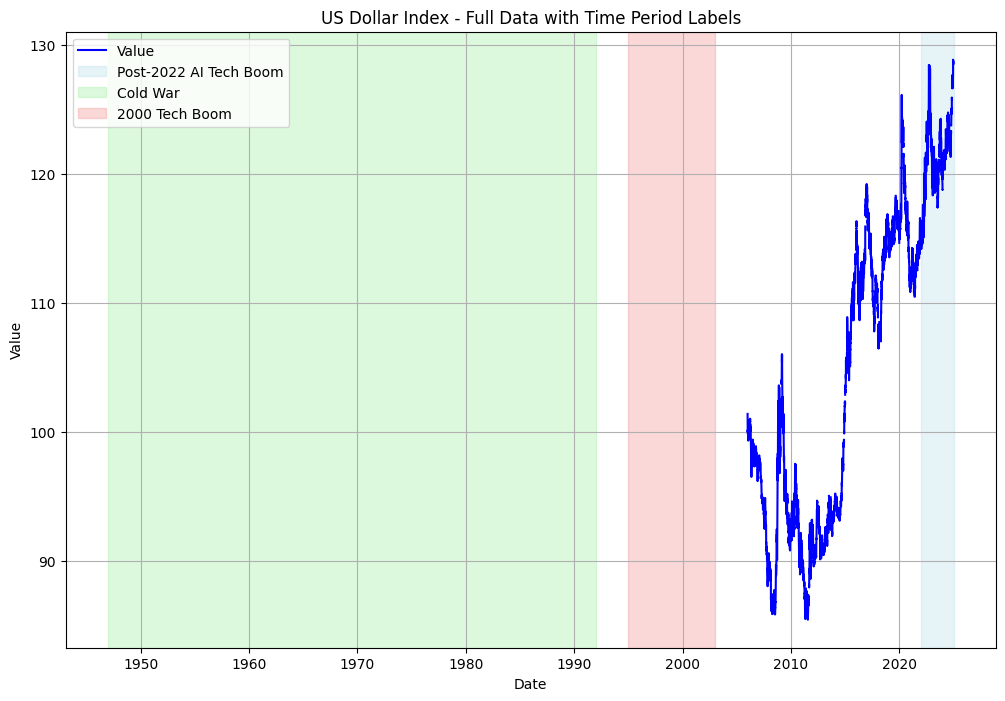

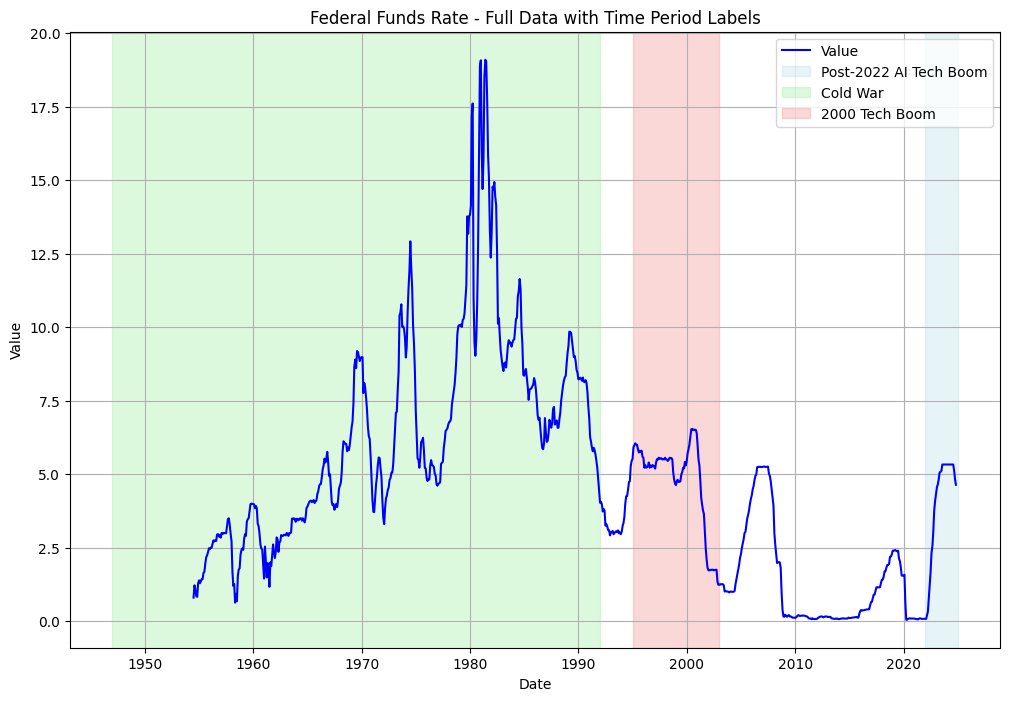

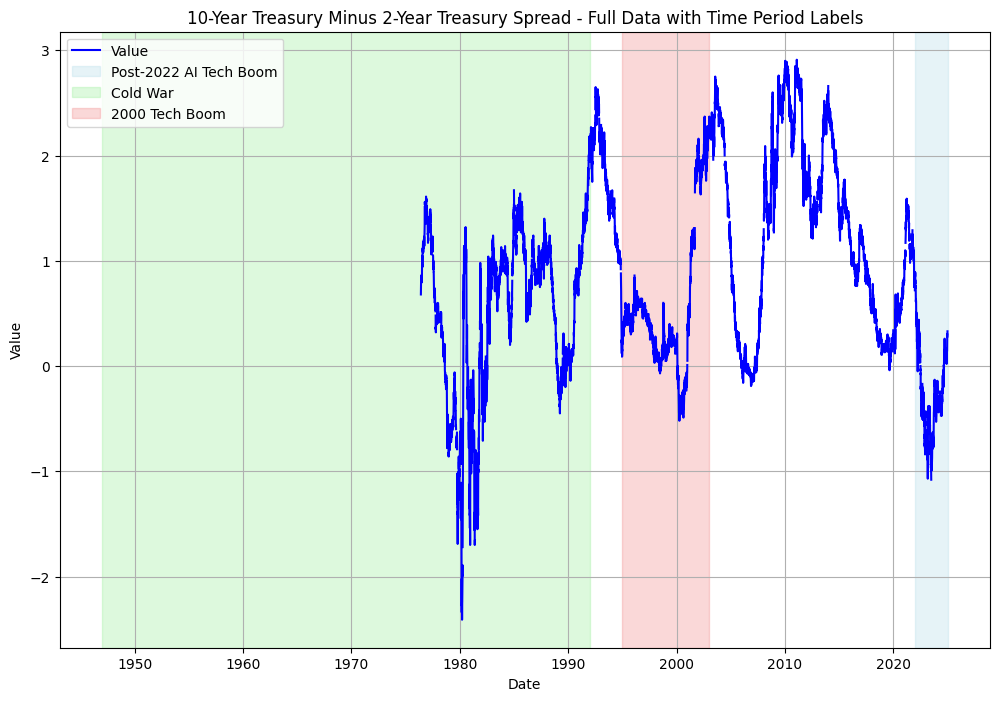

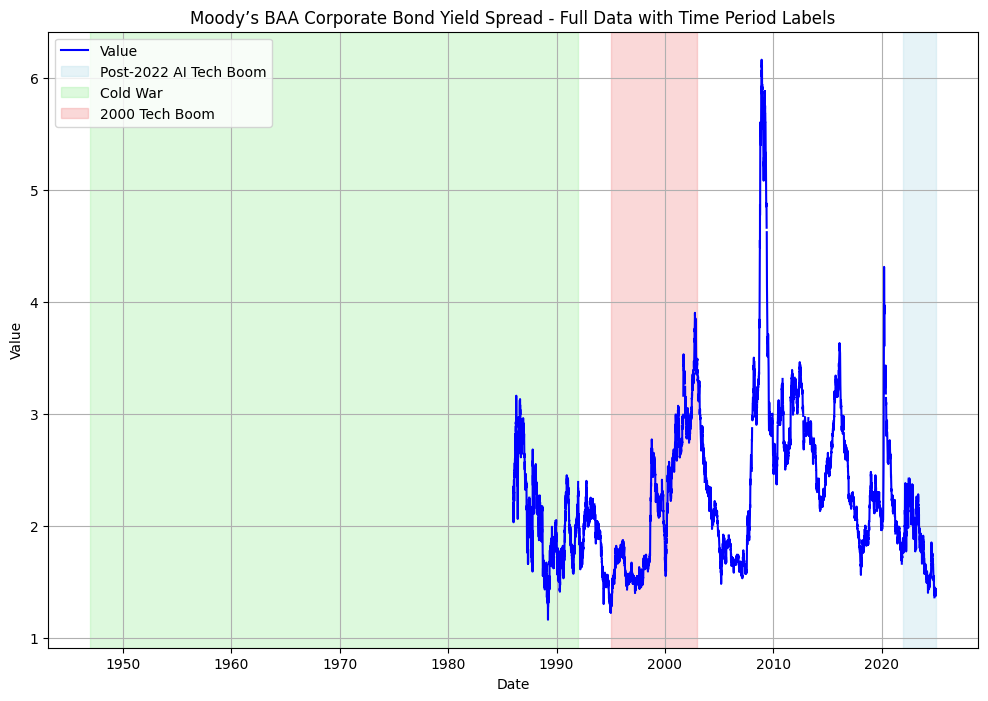

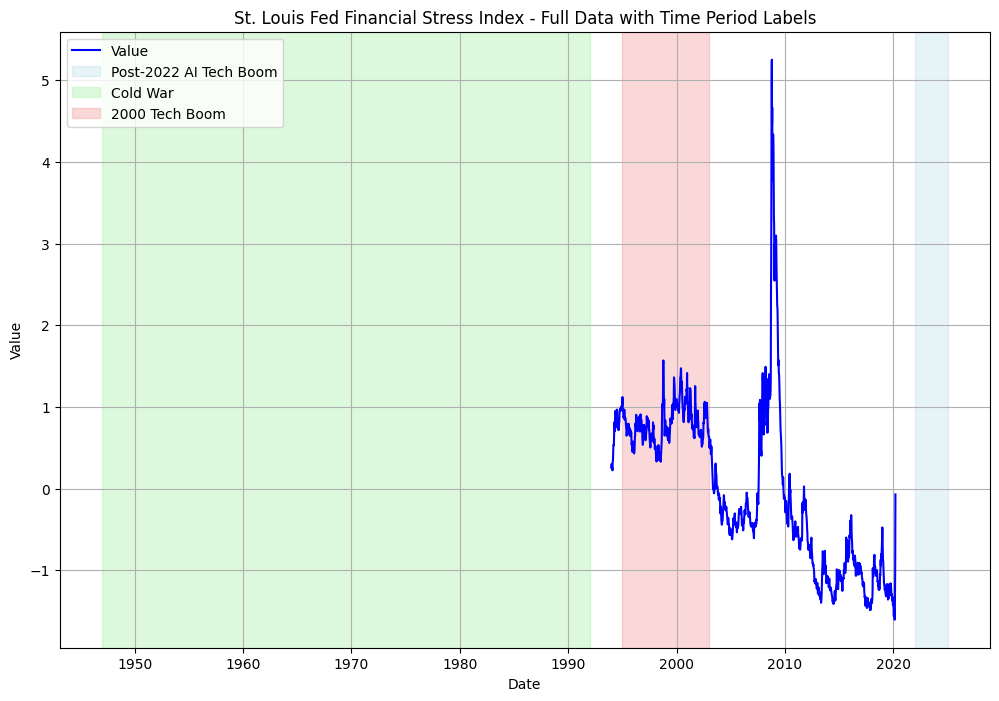

In [56]:
# Function to plot all data for a FRED series with time periods labeled and differentiated by color
def plot_fred_with_time_period_labels(fred_data, time_periods, fred_names):
    for series_id, data in fred_data.items():
        # Reset index and ensure date is properly formatted
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index()
        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], utc=True)  # Ensure timezone-aware datetime
            data.set_index('date', inplace=True)

        plt.figure(figsize=(12, 8))
        # Plot all data for the FRED series
        plt.plot(data.index, data['Value'], label="Value", color='blue')

        # Add shaded regions for each time period with different colors
        for period_name, (start_date, end_date) in time_periods.items():
            plt.axvspan(pd.Timestamp(start_date, tz='UTC'), pd.Timestamp(end_date, tz='UTC'),
                        alpha=0.3, color=time_period_colors[period_name], label=period_name)

        # Use the actual name of the FRED series in the title
        plt.title(f"{fred_names[series_id]} - Full Data with Time Period Labels")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage with your fred_data dictionary and fred_series mapping
plot_fred_with_time_period_labels(fred_data, time_periods, fred_series)


In [57]:
# Combine Yahoo Finance data into a single DataFrame and save to CSV
if yahoo_data:
    df_yahoo = pd.concat(yahoo_data.values(), ignore_index=False)
    df_yahoo.reset_index(inplace=True)
    df_yahoo.to_csv('yahoo_data.csv', index=False)
else:
    print("No Yahoo Finance data to save.")

# Combine FRED data into a single DataFrame and save to CSV
if fred_data:
    df_fred = pd.concat(fred_data.values(), ignore_index=False)
    df_fred.reset_index(inplace=True)
    df_fred.rename(columns={"index":"date"},inplace=True)
    df_fred.to_csv('fred_data.csv', index=False)
else:
    print("No FRED data to save.")

In [58]:

# Set 'date' as index for easier manipulation
df_yahoo.set_index('date', inplace=True)
df_fred.set_index('date', inplace=True)

# Calculate daily returns for each ticker in df_yahoo (using 'adjclose' column)
tickers = df_yahoo['symbol'].unique()
returns = pd.DataFrame()

for ticker in tickers:
    ticker_data = df_yahoo[df_yahoo['symbol'] == ticker]
    returns[ticker] = ticker_data['adjclose'].pct_change().dropna()

# Display the first few rows of returns
returns.head()


,^DJI,^GSPC,^N225,^FTSE,^HSI,^BSESN,^MXX,^BVSP,^RTS,CL=F,...,USDMXN=X,USDZAR=X,^TNX,^TYX,^FVX,^IRX,LQD,HYG,^VIX,BTC-USD
date,,,,,,,,,,,,,,,,,,,,,
1992-01-03,0.009173,0.004985,NaN,0.004533,0.001232,NaN,0.020970,NaN,NaN,NaN,...,NaN,NaN,0.010324,0.002681,0.011706,-0.002591,NaN,NaN,-0.010554,NaN
1992-01-06,-0.000437,-0.003291,0.035565,-0.004353,-0.000023,NaN,-0.001830,NaN,NaN,NaN,...,NaN,NaN,-0.004380,-0.005348,-0.004959,-0.010390,NaN,NaN,0.011200,NaN
1992-01-07,0.001469,-0.001340,-0.009865,-0.004131,0.009496,NaN,0.008761,NaN,NaN,NaN,...,NaN,NaN,-0.008798,-0.006720,-0.013289,-0.015748,NaN,NaN,0.014241,NaN
1992-01-08,-0.000281,0.001677,-0.036127,-0.006363,-0.002346,NaN,0.020398,NaN,NaN,NaN,...,NaN,NaN,0.001479,0.002706,0.003367,-0.008000,NaN,NaN,-0.026521,NaN
1992-01-09,0.001748,-0.001172,0.017550,0.012484,-0.000738,NaN,0.009171,NaN,NaN,NaN,...,NaN,NaN,0.002954,0.001350,0.010067,0.013441,NaN,NaN,0.012821,NaN


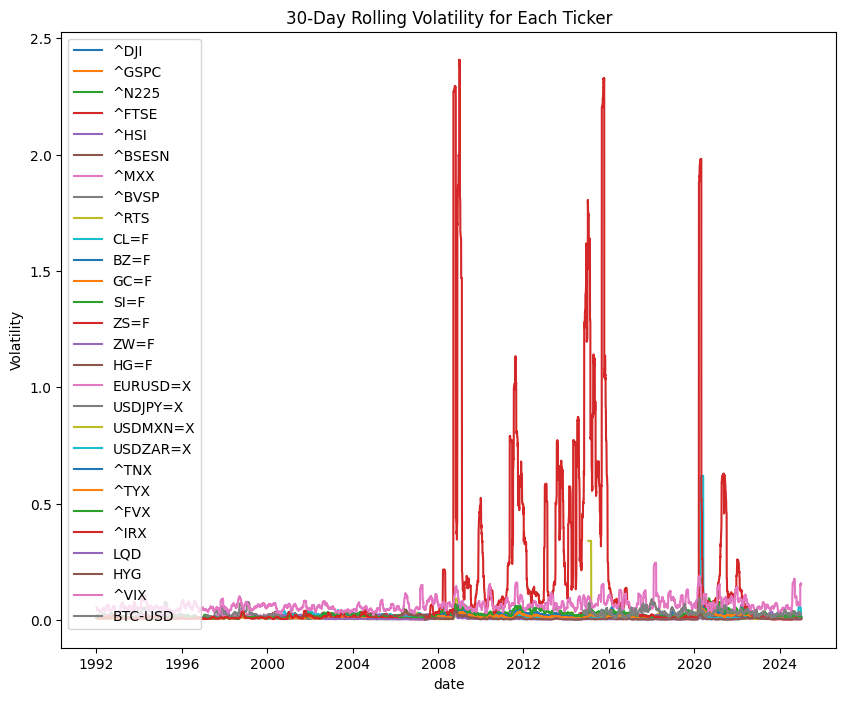

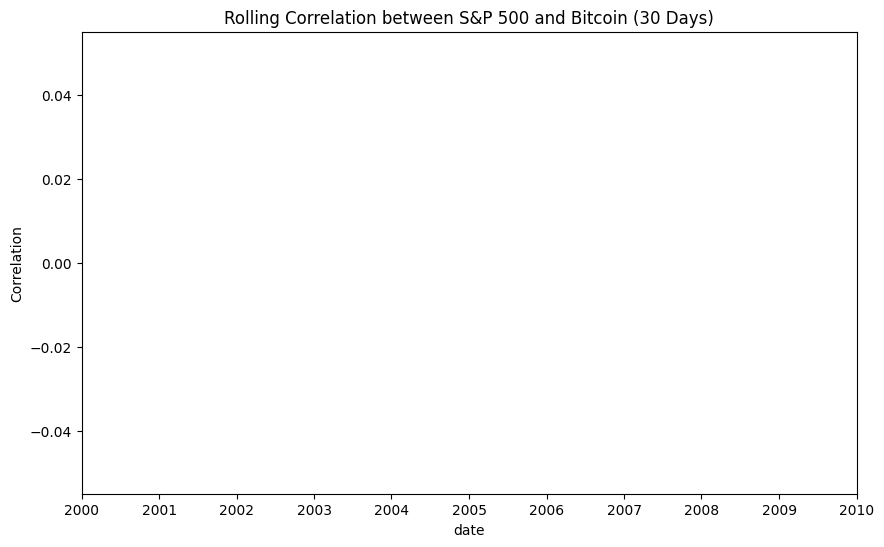

In [59]:
# Calculate rolling volatility (30-day window) for each ticker
rolling_volatility = pd.DataFrame()

for ticker in tickers:
    ticker_data = df_yahoo[df_yahoo['symbol'] == ticker]
    rolling_volatility[ticker] = ticker_data['adjclose'].pct_change().rolling(window=30).std()

# Plot rolling volatility for each ticker
rolling_volatility.plot(figsize=(10, 8))
plt.title('30-Day Rolling Volatility for Each Ticker')
plt.ylabel('Volatility')
plt.legend(tickers)
plt.show()

# Calculate rolling correlations between S&P 500 and Bitcoin, S&P 500 and Oil (assuming 'BTC-USD' and 'CL=F' in data)
sp500_ticker = '^DJI'  # Example ticker for S&P 500
bitcoin_ticker = 'BTC-USD'  # Example ticker for Bitcoin

# Make sure the tickers exist in your df_yahoo and calculate rolling correlation
df_sp500 = df_yahoo[df_yahoo['symbol'] == sp500_ticker]
df_bitcoin = df_yahoo[df_yahoo['symbol'] == bitcoin_ticker]

# Rolling correlation calculation between two tickers (30-day window)
rolling_corr_sp500_bitcoin = df_sp500['adjclose'].rolling(window=30).corr(df_bitcoin['adjclose'])

# Plot rolling correlation
rolling_corr_sp500_bitcoin.plot(figsize=(10, 6), title='Rolling Correlation between S&P 500 and Bitcoin (30 Days)')
plt.ylabel('Correlation')
plt.show()


In [60]:
# Hypothesis: Correlation between Bitcoin (AI-driven market) and Oil (war risk)
bitcoin_ticker = 'BTC-USD'  # Replace with actual Bitcoin ticker
oil_ticker = 'CL=F'  # Replace with actual Oil ticker

# Calculate correlation between Bitcoin and Oil, assuming both are in df_yahoo
df_bitcoin = df_yahoo[df_yahoo['symbol'] == bitcoin_ticker]
df_oil = df_yahoo[df_yahoo['symbol'] == oil_ticker]

# Calculate correlation
corr_bitcoin_oil = df_bitcoin['adjclose'].corr(df_oil['adjclose'])

# Perform correlation test between S&P 500 and VIX (market sentiment)
sp500_ticker = '^DJI'  # Replace with actual S&P 500 ticker
vix_ticker = '^VIX'  # Replace with actual VIX ticker

df_sp500 = df_yahoo[df_yahoo['symbol'] == sp500_ticker]
df_vix = df_yahoo[df_yahoo['symbol'] == vix_ticker]

corr_sp500_vix = df_sp500['adjclose'].corr(df_vix['adjclose'])

# Print correlation results
print(f"Correlation between Bitcoin and Oil: {corr_bitcoin_oil}")
print(f"Correlation between S&P 500 and VIX: {corr_sp500_vix}")


Correlation between Bitcoin and Oil: 0.5391683857660242
Correlation between S&P 500 and VIX: -0.05658548249687344


# NEED TO ADD OVERALL LIQUIDITY TICKERS

Multiple hypotheses you could test for the given research using the data and context you’ve provided:

### 1. **Impact of Geopolitical Risk on Market Performance**
   **Hypothesis:** Geopolitical conflicts (such as wars) negatively impact market performance in the short term, but the effect diminishes as investors anticipate long-term stability.
   - **Testable questions:**
     - Does the S&P 500 index show significant negative returns during the start of major geopolitical conflicts (e.g., Russia-Ukraine, Iran-Israel, etc.)?
     - Does the market recover faster when the geopolitical risks are perceived to be less imminent?
     - Use **S&P 500 (GSPC)** and **VIX** to measure short-term volatility and the recovery of equity markets.
   
### 2. **Effect of Nuclear War Risk on Market Sentiment**
   **Hypothesis:** The perceived risk of nuclear war raises market volatility and leads to a decline in market indices (e.g., S&P 500), as well as commodity price increases (gold, oil).
   - **Testable questions:**
     - Does the market react to nuclear conflict risk differently than to conventional wars?
     - Are commodities such as **gold (GC=F)** and **crude oil (CL=F)** negatively correlated with S&P 500 during heightened nuclear war risk?
     - Analyze the relationship between **VIX** and major equity indices during spikes in geopolitical tensions (e.g., during North Korea’s nuclear tests).

### 3. **AI's Economic Impact Outweighs War Risks**
   **Hypothesis:** AI-driven technological growth (e.g., tech stocks driven by ChatGPT-like advancements) continues to propel markets, even amid increasing geopolitical tensions.
   - **Testable questions:**
     - How does AI-related growth in the tech sector (e.g., **Nikkei 225 (N225)** and **S&P 500**) compare with periods of heightened geopolitical risk?
     - Is there a positive correlation between major tech stock price increases and developments in AI during periods of war risks (use **NVIDIA (NVDA)** or similar stocks)?
     - Measure the **returns of tech indices (e.g., NASDAQ)** versus **S&P 500** during high-risk geopolitical events.
   
### 4. **Market Responses to War Risks**
   **Hypothesis:** Cryptocurrency markets (e.g., Bitcoin) respond more sensitively to geopolitical risks than traditional markets (S&P 500, Dow Jones).
   - **Testable questions:**
     - Does **Bitcoin (BTC-USD)** experience sharp declines when geopolitical conflicts intensify, particularly during events such as drone attacks or border escalations?
     - Is there a divergence between traditional equity market performance (e.g., **S&P 500**) and Bitcoin performance during the onset of geopolitical tensions?
     - Use **VIX** and **Bitcoin volatility** to assess the risk perception differences between traditional markets and cryptocurrencies.

### 5. **AI-Driven Tech Boom vs. War Impact on Market Growth**
   **Hypothesis:** AI-driven tech boom leads to stronger market growth than geopolitical risks, with the S&P 500 and related indices reflecting the optimism in the tech sector.
   - **Testable questions:**
     - How do the returns of tech-heavy indices (e.g., **NASDAQ**, **S&P 500** tech stocks) compare to commodity or bond indices during periods of geopolitical conflict?
     - Does the increase in AI stocks (e.g., **Microsoft, NVIDIA**) coincide with a reduction in market sensitivity to geopolitical tensions?
     - Measure the correlation between **S&P 500** and **Bitcoin** during periods of both AI booms and geopolitical tensions.

### 6. **Comparison of Current Periods with Tech Boom and Cold War**
   **Hypothesis:** The current market conditions show patterns similar to those observed during the 2000 tech boom and the Cold War era, with unique effects from AI.
   - **Testable questions:**
     - Are current market returns more similar to the **2000 Tech Boom** or the **Cold War** in terms of volatility, sector performance, and the influence of geopolitical risk?
     - Compare **S&P 500** performance during the **Cold War period (1947-1991)** with current market periods.
     - Analyze the role of technology stocks in the **2000 Tech Boom** and compare them to current AI-driven stock performance.

### 7. **AI Impact on Inflation and Employment Amid War Risks**
   **Hypothesis:** AI-related productivity gains offset inflationary pressures and prevent large-scale unemployment during periods of geopolitical conflict.
   - **Testable questions:**
     - How do employment numbers (**PAYEMS**) and inflation rates (**CPIAUCSL**) compare during times of heightened geopolitical tensions and during periods of rapid technological advancement?
     - Does AI growth correlate with improvements in productivity, countering the negative impact of war on GDP growth (**GDP**)?
     - Use **GDP** and **Unemployment Rate (UNRATE)** to analyze the combined effects of AI and geopolitical risks on macroeconomic indicators.

### 8. **Effectiveness of AI in Mitigating Risk Premium in War Periods**
   **Hypothesis:** AI helps reduce the risk premium demanded by investors during war periods, reflected by lower risk-free rates and bond yields.
   - **Testable questions:**
     - Does the **Federal Funds Rate (FEDFUNDS)** decrease during periods of AI growth despite increased geopolitical risks?
     - How do bond yields (**10-Year Treasury Yield - ^TNX**) behave in relation to geopolitical tensions and AI-driven growth in the market?
     - Compare **Corporate Bond ETFs (LQD, HYG)** performance during periods of geopolitical instability, contrasting with **S&P 500**.

### 9. **Market’s Pricing of War and AI Risks**
   **Hypothesis:** The market prices in geopolitical risks differently depending on AI sector growth, with AI-driven optimism absorbing some of the risks typically priced into equities during conflict periods.
   - **Testable questions:**
     - How do risk premiums (as reflected in **VIX**, **10-Year Treasury Yield**) behave during high geopolitical risk periods, especially when AI tech stocks perform well?
     - Does market volatility (measured by **VIX**) rise less during war periods when AI stocks are growing rapidly?

### Data Analysis Plan:
- **Time Series Analysis:** Use rolling windows to calculate the **volatility (VIX)**, **returns** for indices like **S&P 500** (GSPC), **Bitcoin** (BTC-USD), and commodities to understand the relationship between AI growth and geopolitical risks.
- **Event Study Analysis:** Focus on specific geopolitical events and AI product launches to measure stock price movements, volatility, and sentiment shifts.
- **Cross-Country Comparisons:** Compare market responses in countries with differing levels of exposure to geopolitical risks (e.g., **US** vs **Iran**).

### Key Variables:
- **Equity Indices (e.g., S&P 500, Dow Jones)**: To analyze overall market performance.
- **Volatility Index (VIX)**: To measure market risk perceptions.
- **Cryptocurrency Performance (Bitcoin)**: To measure alternative market reactions to geopolitical risks.
- **Treasury Yields (TNX, TYX)**: To measure market sentiment on risk-free assets.
- **Commodities (Gold, Oil)**: To capture investor risk aversion during geopolitical crises.
- **Macroeconomic Indicators (GDP, Unemployment, CPI)**: To analyze the broader economic impact of AI and war risks.

These hypotheses provide a comprehensive framework for testing the impact of AI and geopolitical risks on markets using the given data sources.

In [ ]:
# Define a function to calculate returns around a given event date for multiple tickers
def event_study_multiple_tickers(event_date, tickers, df_yahoo, window=5):
    event_date = pd.to_datetime(event_date)
    results = {}
    
    for ticker in tickers:
        ticker_data = df_yahoo[df_yahoo['symbol'] == ticker]
        
        # Ensure data is sorted by date before accessing
        ticker_data = ticker_data.sort_values('date')
        
        # Define the before and after periods
        before_event = ticker_data[(ticker_data['date'] >= event_date - pd.Timedelta(days=window)) & 
                                   (ticker_data['date'] < event_date)]
        after_event = ticker_data[(ticker_data['date'] > event_date) & 
                                  (ticker_data['date'] <= event_date + pd.Timedelta(days=window))]
        
        # Calculate percentage change (returns) and drop NA values
        before_event_returns = before_event['adjclose'].pct_change().dropna()
        after_event_returns = after_event['adjclose'].pct_change().dropna()
        
        # Store results for this ticker
        results[ticker] = {'before': before_event_returns, 'after': after_event_returns}
    
    return results

# Example: Event study for a geopolitical event on '2023-10-01' (update with actual dates)
event_results = event_study_multiple_tickers('2023-10-01', tickers, df_yahoo)

# Plot event study for all tickers
plt.figure(figsize=(10, 6))

for ticker in tickers:
    before = event_results[ticker]['before']
    after = event_results[ticker]['after']
    
    plt.plot(before.index, before.values, label=f'{ticker} - Before Event', linestyle='--')
    plt.plot(after.index, after.values, label=f'{ticker} - After Event')

plt.title('Stock Price Changes Around Geopolitical Event')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

# Define periods for comparison: 2000 tech boom and cold war
tech_boom_period = ('1999-01-01', '2001-12-31')
cold_war_period = ('1947-06-01', '1991-12-31')  # Use actual start and end dates

# Filter data for these periods for all tickers
tech_boom_data = df_yahoo[(df_yahoo['date'] >= tech_boom_period[0]) & (df_yahoo['date'] <= tech_boom_period[1])]
cold_war_data = df_yahoo[(df_yahoo['date'] >= cold_war_period[0]) & (df_yahoo['date'] <= cold_war_period[1])]

# Calculate average returns during these periods for all tickers
tech_boom_returns = tech_boom_data.groupby('symbol')['adjclose'].pct_change().mean()
cold_war_returns = cold_war_data.groupby('symbol')['adjclose'].pct_change().mean()

# Print comparisons
print("Average returns during the 2000 Tech Boom:")
print(tech_boom_returns)

print("\nAverage returns during the Cold War period:")
print(cold_war_returns)
# FIX


KeyError: 'date'